# **Great Learning Hotel Cancellation Project** #

In [166]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
import platform
import sys

# How to tell python version
#print (sys.version_info)
#print (platform.python_version())

# How to pip install from Terminal window:
# python -m pip install seaborn


### <u>**Data Import and Basic Info**</u>

In [167]:
# Import data into DataFrame
# Renamed CSV file is assumed to live in same folder as my notebook
df_HotelData = pd.read_csv("Dataset-Hotel Booking Cancellation Prediction.csv")

# Make a copy of the dataframe to contain the modifications completed in this workbook
df_HotelData_new = df_HotelData.copy(deep=True)

# Let's look at what we just imported and get some more info
# I like to delineate output to make it more readable
print("***********************************")
print("Basic Info of imported data set")
print("***********************************")
print()

# Print df Column Info
df_HotelData.info()
print()
print()

# Print Stats
print("Description - Stats")
print()
pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', None)
print(df_HotelData.describe(include='all').T)
print()
print(df_HotelData.head(20))
print()



***********************************
Basic Info of imported data set
***********************************

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9069 entries, 0 to 9068
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            9069 non-null   object 
 1   no_of_adults                          9069 non-null   int64  
 2   no_of_children                        9069 non-null   int64  
 3   no_of_weekend_nights                  9069 non-null   int64  
 4   no_of_week_nights                     9069 non-null   int64  
 5   type_of_meal_plan                     9069 non-null   object 
 6   required_car_parking_space            9069 non-null   int64  
 7   room_type_reserved                    9069 non-null   object 
 8   lead_time                             9069 non-null   int64  
 9   arrival_year                          9069 non

### <u>**Clean up DataTypes to be most efficient memory/performance usage**</u>

**#1)** In the previous Capstone (#1) - I identified that I wanted to change the yes/no columns to be of type bool  
        This **imported modified new csv** data set already contains those conversions  
        Those column names include:  
        &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;**is_married, is_employed, has_health_insurance, has_medicaid**  
        This **imported modified new csv** data set already contains these conversions  
  
**#2)** In the previous Capstone (#1) - I identified that it didn't particularly make sense to have **family_income** as a float64 type.  
        It makes sense to change it to an **int32** with a max value of: 2,147,483,647  
        This **imported modified new csv** data set already contains this conversion  

**#3)** The following **int64** types can be converted to **int16**. (After some thought I thought we might encounter some larger numbers - max 32,767).  
        Patients could conceiv
        Those column names include:  
        &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;**physician_office_visits, nonphysician_office_visits, physician_outpatient_visits,**  
        &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;**nonphysician_outpatient_visits, emergency_room_visits, number_of_hospital_stays, number_of_chronic_conditions**

**#4)** The following **int64** types can be converted to **int8**. (After some thought I thought we might encounter some larger numbers).  
        Patients could conceiv
        Those column names include:  
        &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;**years_of_education, age**

#### <u>**Drop Columns that aren't useful** </u> ####
The id and unnamed columns will hold new value as we analyze/plot column values so drop them

In [168]:
df_HotelData_new.drop('Booking_ID', axis=1, inplace=True)

#### <u>**Data Type Conversions** </u> ####

In [169]:
# Int64 to Int16 conversions
columns = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 
            'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 
            'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 
            'avg_price_per_room', 'no_of_special_requests']

df_HotelData_new[columns] = df_HotelData_new[columns].astype('int16')

print()
print("Dataframe with modified data types:")
df_HotelData_new.info()
print()
print()
print(df_HotelData_new.head(20))
print()


Dataframe with modified data types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9069 entries, 0 to 9068
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   no_of_adults                          9069 non-null   int16 
 1   no_of_children                        9069 non-null   int16 
 2   no_of_weekend_nights                  9069 non-null   int16 
 3   no_of_week_nights                     9069 non-null   int16 
 4   type_of_meal_plan                     9069 non-null   object
 5   required_car_parking_space            9069 non-null   int16 
 6   room_type_reserved                    9069 non-null   object
 7   lead_time                             9069 non-null   int16 
 8   arrival_year                          9069 non-null   int16 
 9   arrival_month                         9069 non-null   int16 
 10  arrival_date                          9069 non-null   int16

### <u>**Some basic data analysis on the dataframe columns**</u>
  
For starters, lets iterate over all the numeric columns and get the following stats:  
&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;min, max, mean, median, average and variance

In [170]:
# Iterate over numeric columns
print("Min, Max, Mean, Median and Variance of numeric columns in dataset")
print()
for col_name, col_data in df_HotelData_new.select_dtypes(include=['number']).items():
    print(f"{col_name:40s} min:{col_data.min():>10}, max:{col_data.max():>10}, mean:{col_data.mean():>10.4f}, median:{col_data.median():>10.4f},  variance:{col_data.var():>10.4f}")
    
print()
print()

Min, Max, Mean, Median and Variance of numeric columns in dataset

no_of_adults                             min:         0, max:         4, mean:    1.8413, median:    2.0000,  variance:    0.2669
no_of_children                           min:         0, max:        10, mean:    0.1066, median:    0.0000,  variance:    0.1698
no_of_weekend_nights                     min:         0, max:         7, mean:    0.8124, median:    1.0000,  variance:    0.7691
no_of_week_nights                        min:         0, max:        17, mean:    2.2097, median:    2.0000,  variance:    2.1060
required_car_parking_space               min:         0, max:         1, mean:    0.0302, median:    0.0000,  variance:    0.0293
lead_time                                min:         0, max:       443, mean:   85.1463, median:   56.0000,  variance: 7459.4304
arrival_year                             min:      2017, max:      2018, mean: 2017.8123, median: 2018.0000,  variance:    0.1525
arrival_month          

### <u>**Some basic data analysis on the dataframe columns**</u>
  
For starters, lets iterate over all the numeric columns and plot histograms for the column data.  
I want to see what the distributions for each of the features looks like (skew left, skew right, normal..)
  
In working with no-code KNIME and RapidMiner (AI Studio), I liked the ability to see analysis of imported data  
A nice feature is the histograms they provided.

##### **Plot the Histograms for Numeric Values** #####

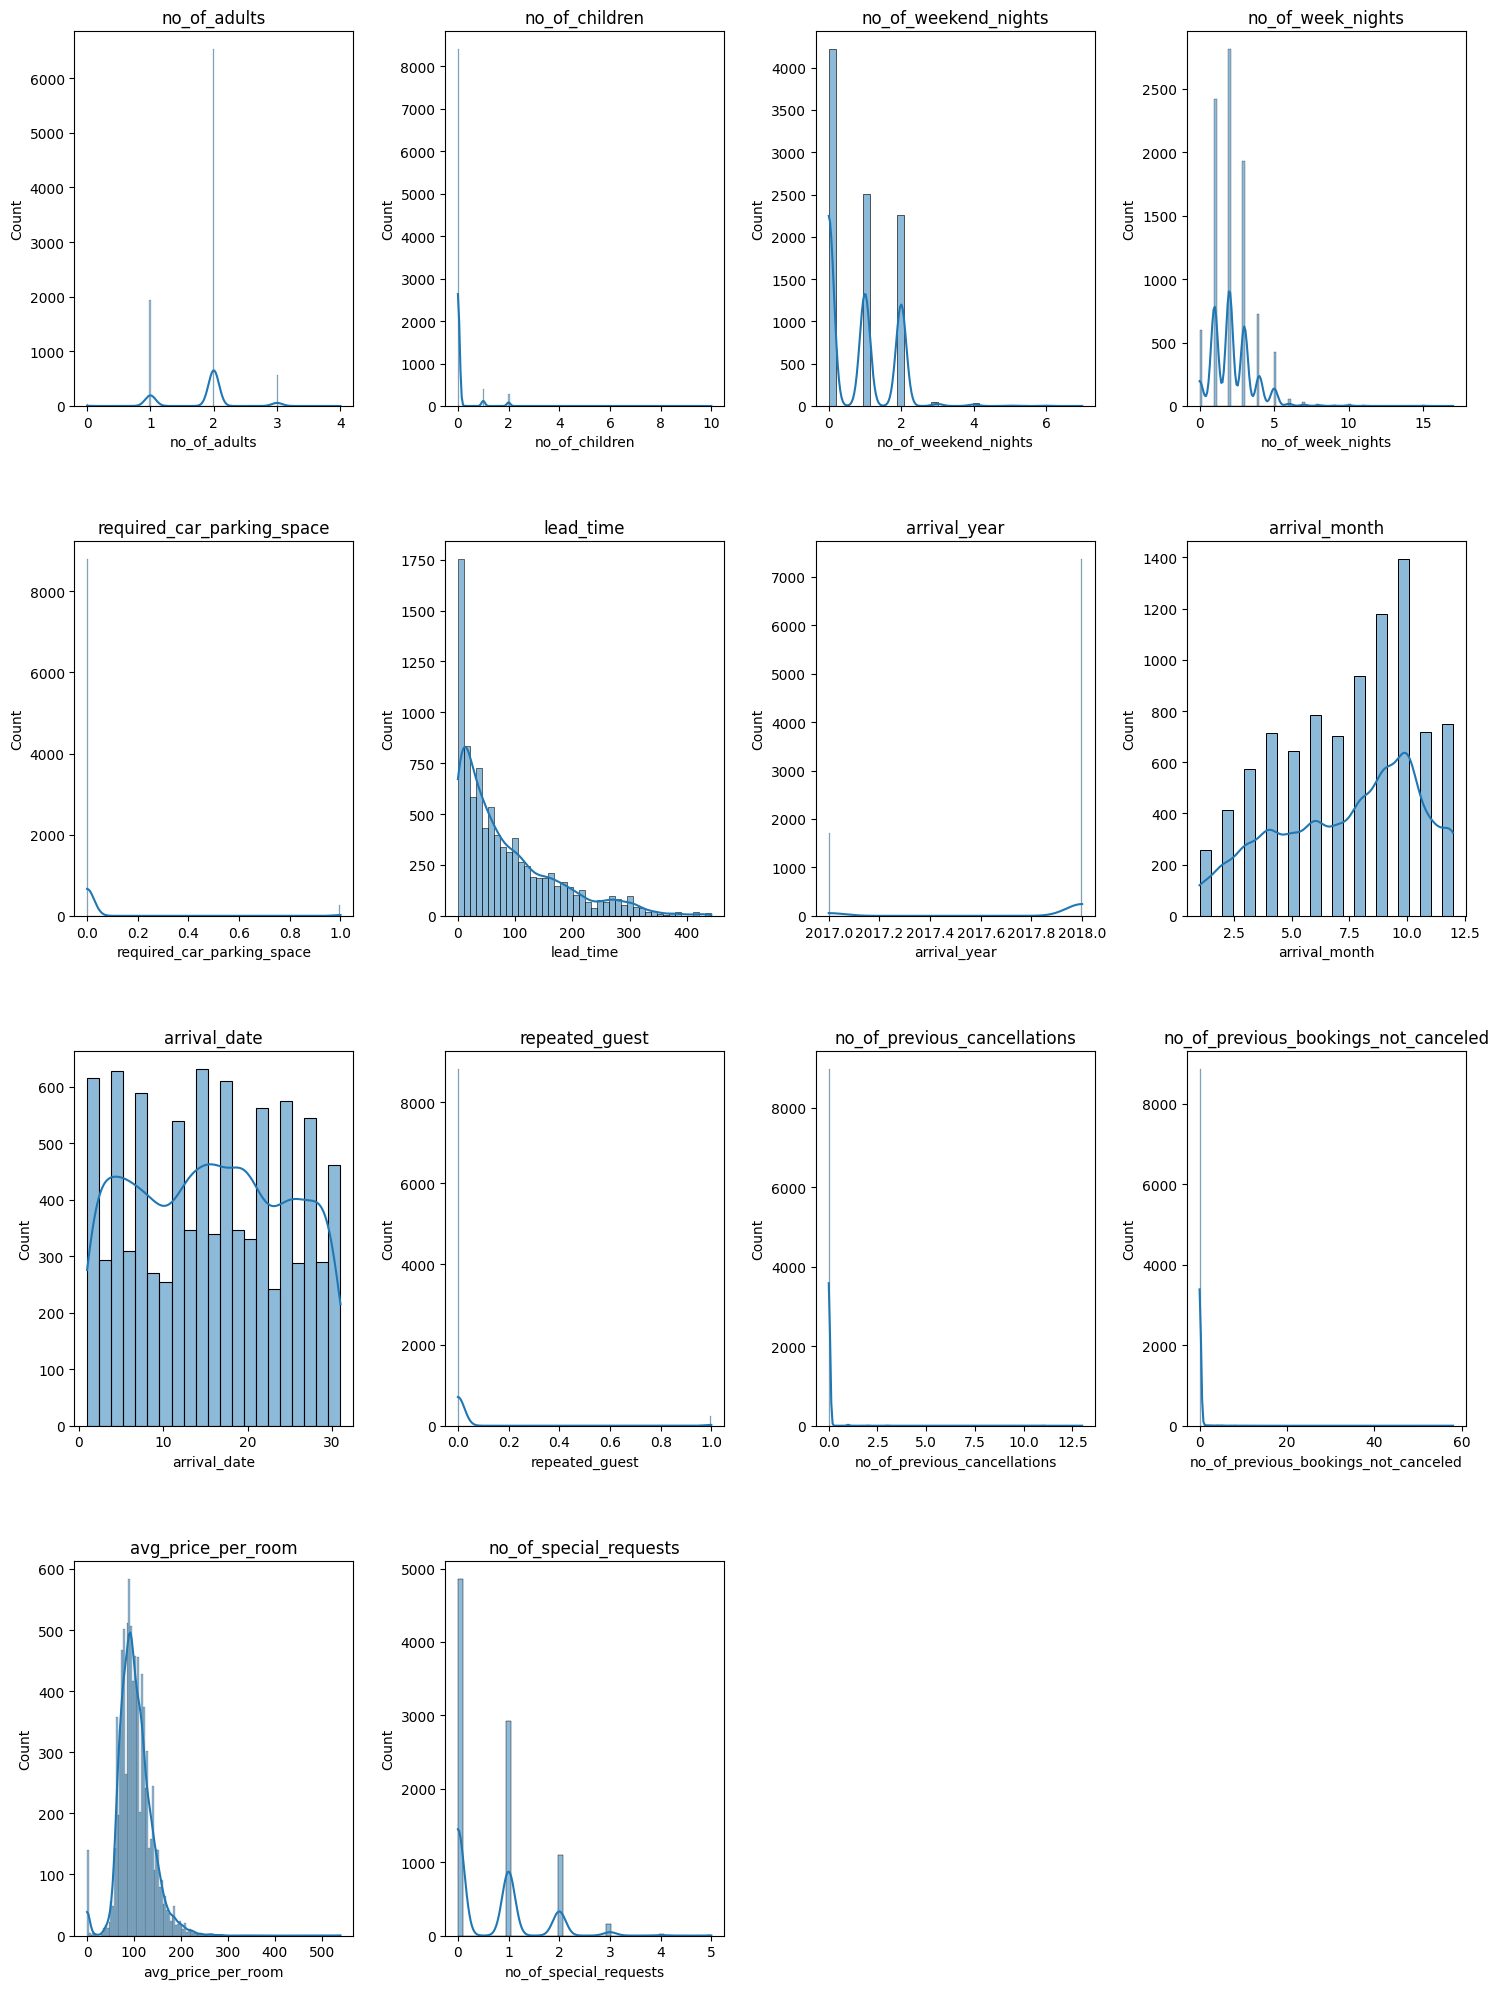

In [171]:
# Figure out the numeric columns
numeric_cols = df_HotelData_new.select_dtypes(include=['number']).columns
n_cols = len(numeric_cols)

# I need a 3X4 plot to display 10 histograms
fig, axes = plt.subplots(nrows=(n_cols + 2) // 4, ncols=4, figsize=(15, 5 * ((n_cols + 2) // 4)))
axes = axes.flatten()

# Iterate over each numeric column and plot a historbram
for i, col in enumerate(numeric_cols):
    sns.histplot(data=df_HotelData_new, x=col, ax=axes[i], kde=True)
    axes[i].set_title(col)

# Hide the blank/empty graphs
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

# Make plots more readable and add space
plt.tight_layout(h_pad=5)
plt.show()    



##### **Plot the Counts of Countable Features** #####

type_of_meal_plan
required_car_parking_space
room_type_reserved
arrival_year
arrival_month
arrival_date
market_segment_type
repeated_guest
no_of_previous_cancellations
no_of_previous_bookings_not_canceled
no_of_special_requests
booking_status


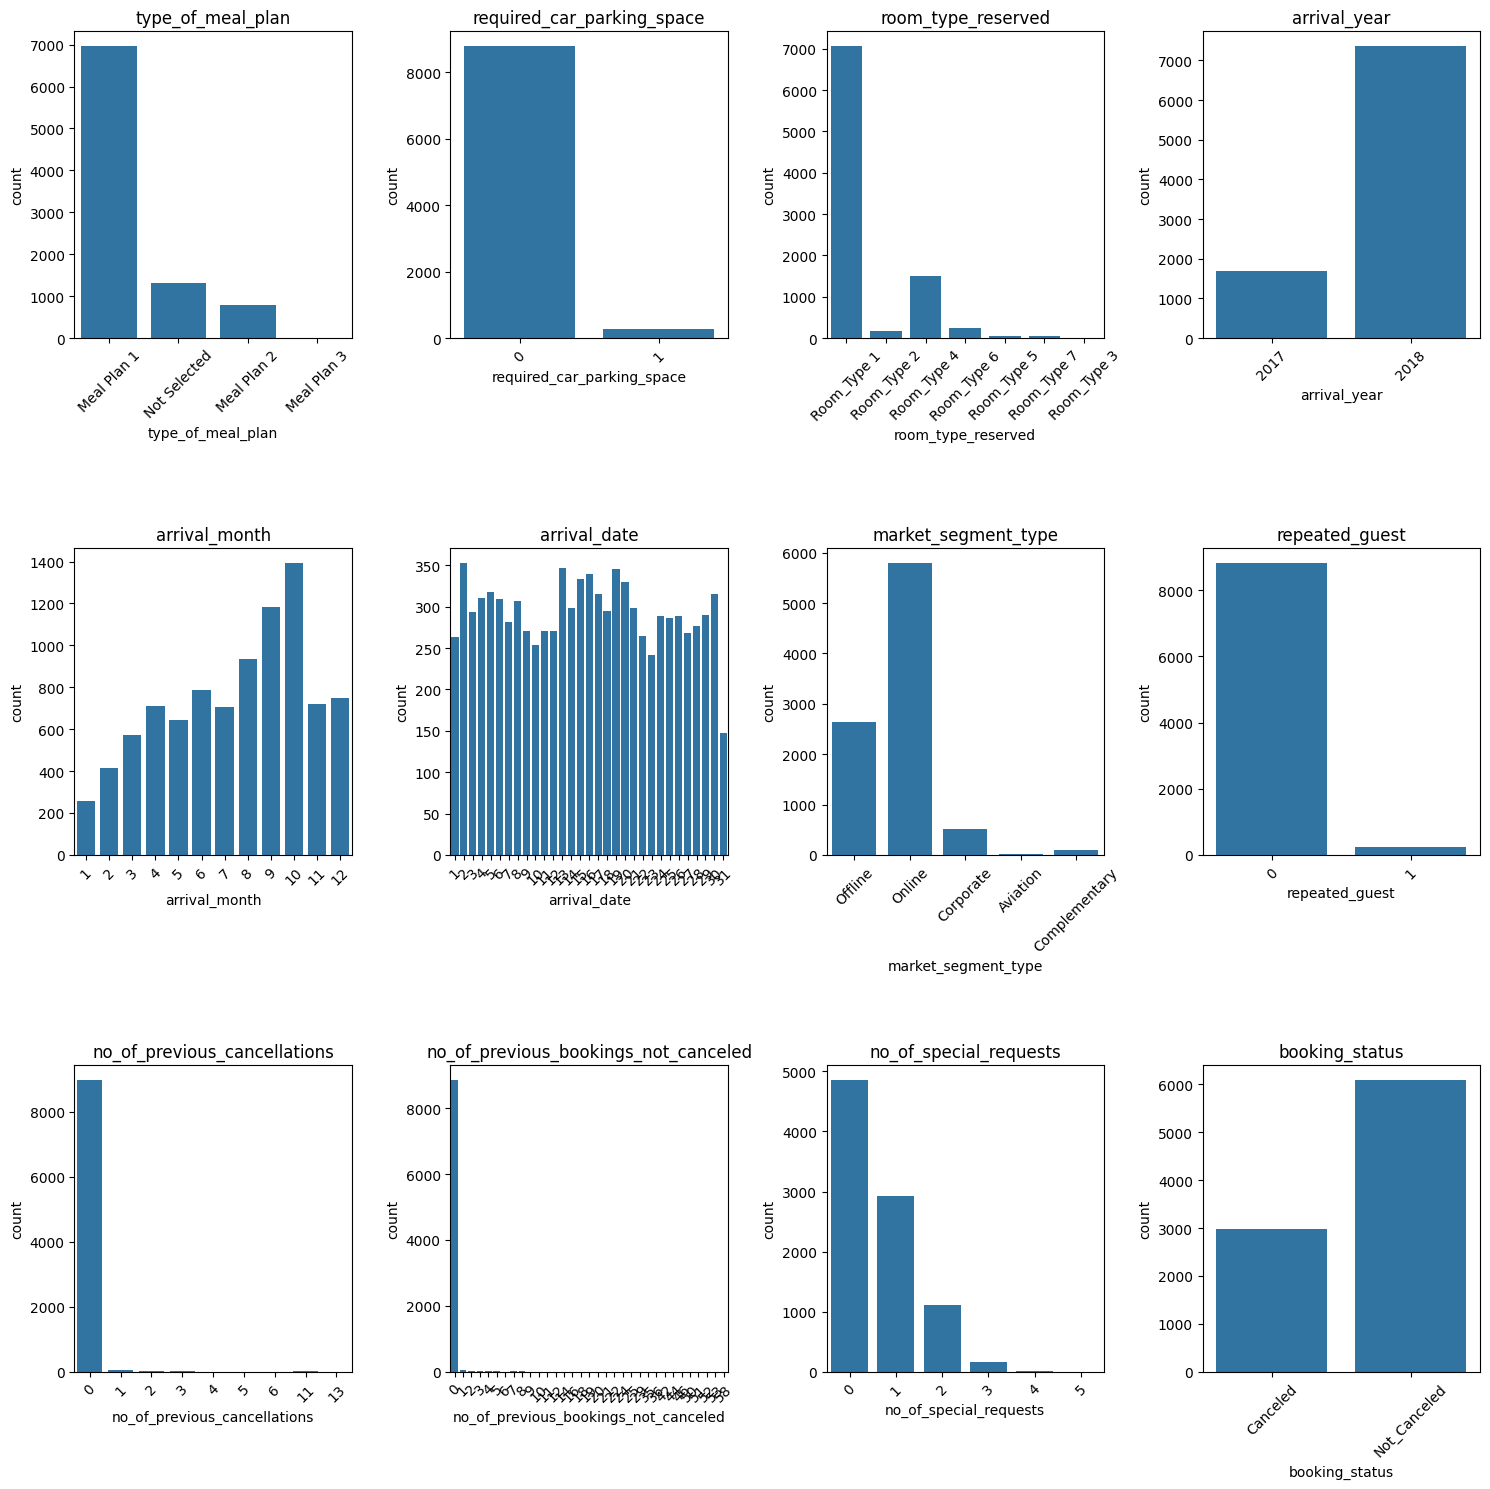

In [172]:
# Figure out the numeric columns
countable_columns =  ['type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved',
                        'arrival_year', 'arrival_month', 'arrival_date', 'market_segment_type',
                        'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 
                        'no_of_special_requests', 'booking_status']
n_cols = len(countable_columns)

# I need a 3X4 plot to display 12 histograms
fig, axes = plt.subplots(nrows=(n_cols + 2) // 4, ncols=4, figsize=(15, 5 * ((n_cols + 2) // 4)))
axes = axes.flatten()

#sns.countplot(data=df_HotelData_new, x='type_of_meal_plan')

for i, col in enumerate(countable_columns):
    print(col)

# Iterate over each numeric column and plot a historbram
for i, col in enumerate(countable_columns):
    sns.countplot(data=df_HotelData_new, x=col, ax=axes[i])
    axes[i].set_title(col)
    axes[i].tick_params(axis='x', rotation=45)

# Hide the blank/empty graphs
# for j in range(i + 1, len(axes)):
#     axes[j].set_visible(False)

# Make plots more readable and add space
plt.tight_layout(h_pad=5)
plt.show() 

### <u>**Some basic data analysis with boxplots relative to canceled/not canceled**</u>
  
Let's look at each of the features to determine what they look like relative to the canceled/not-canceled
This time we're looking at the numerical features and plotting against booking_status

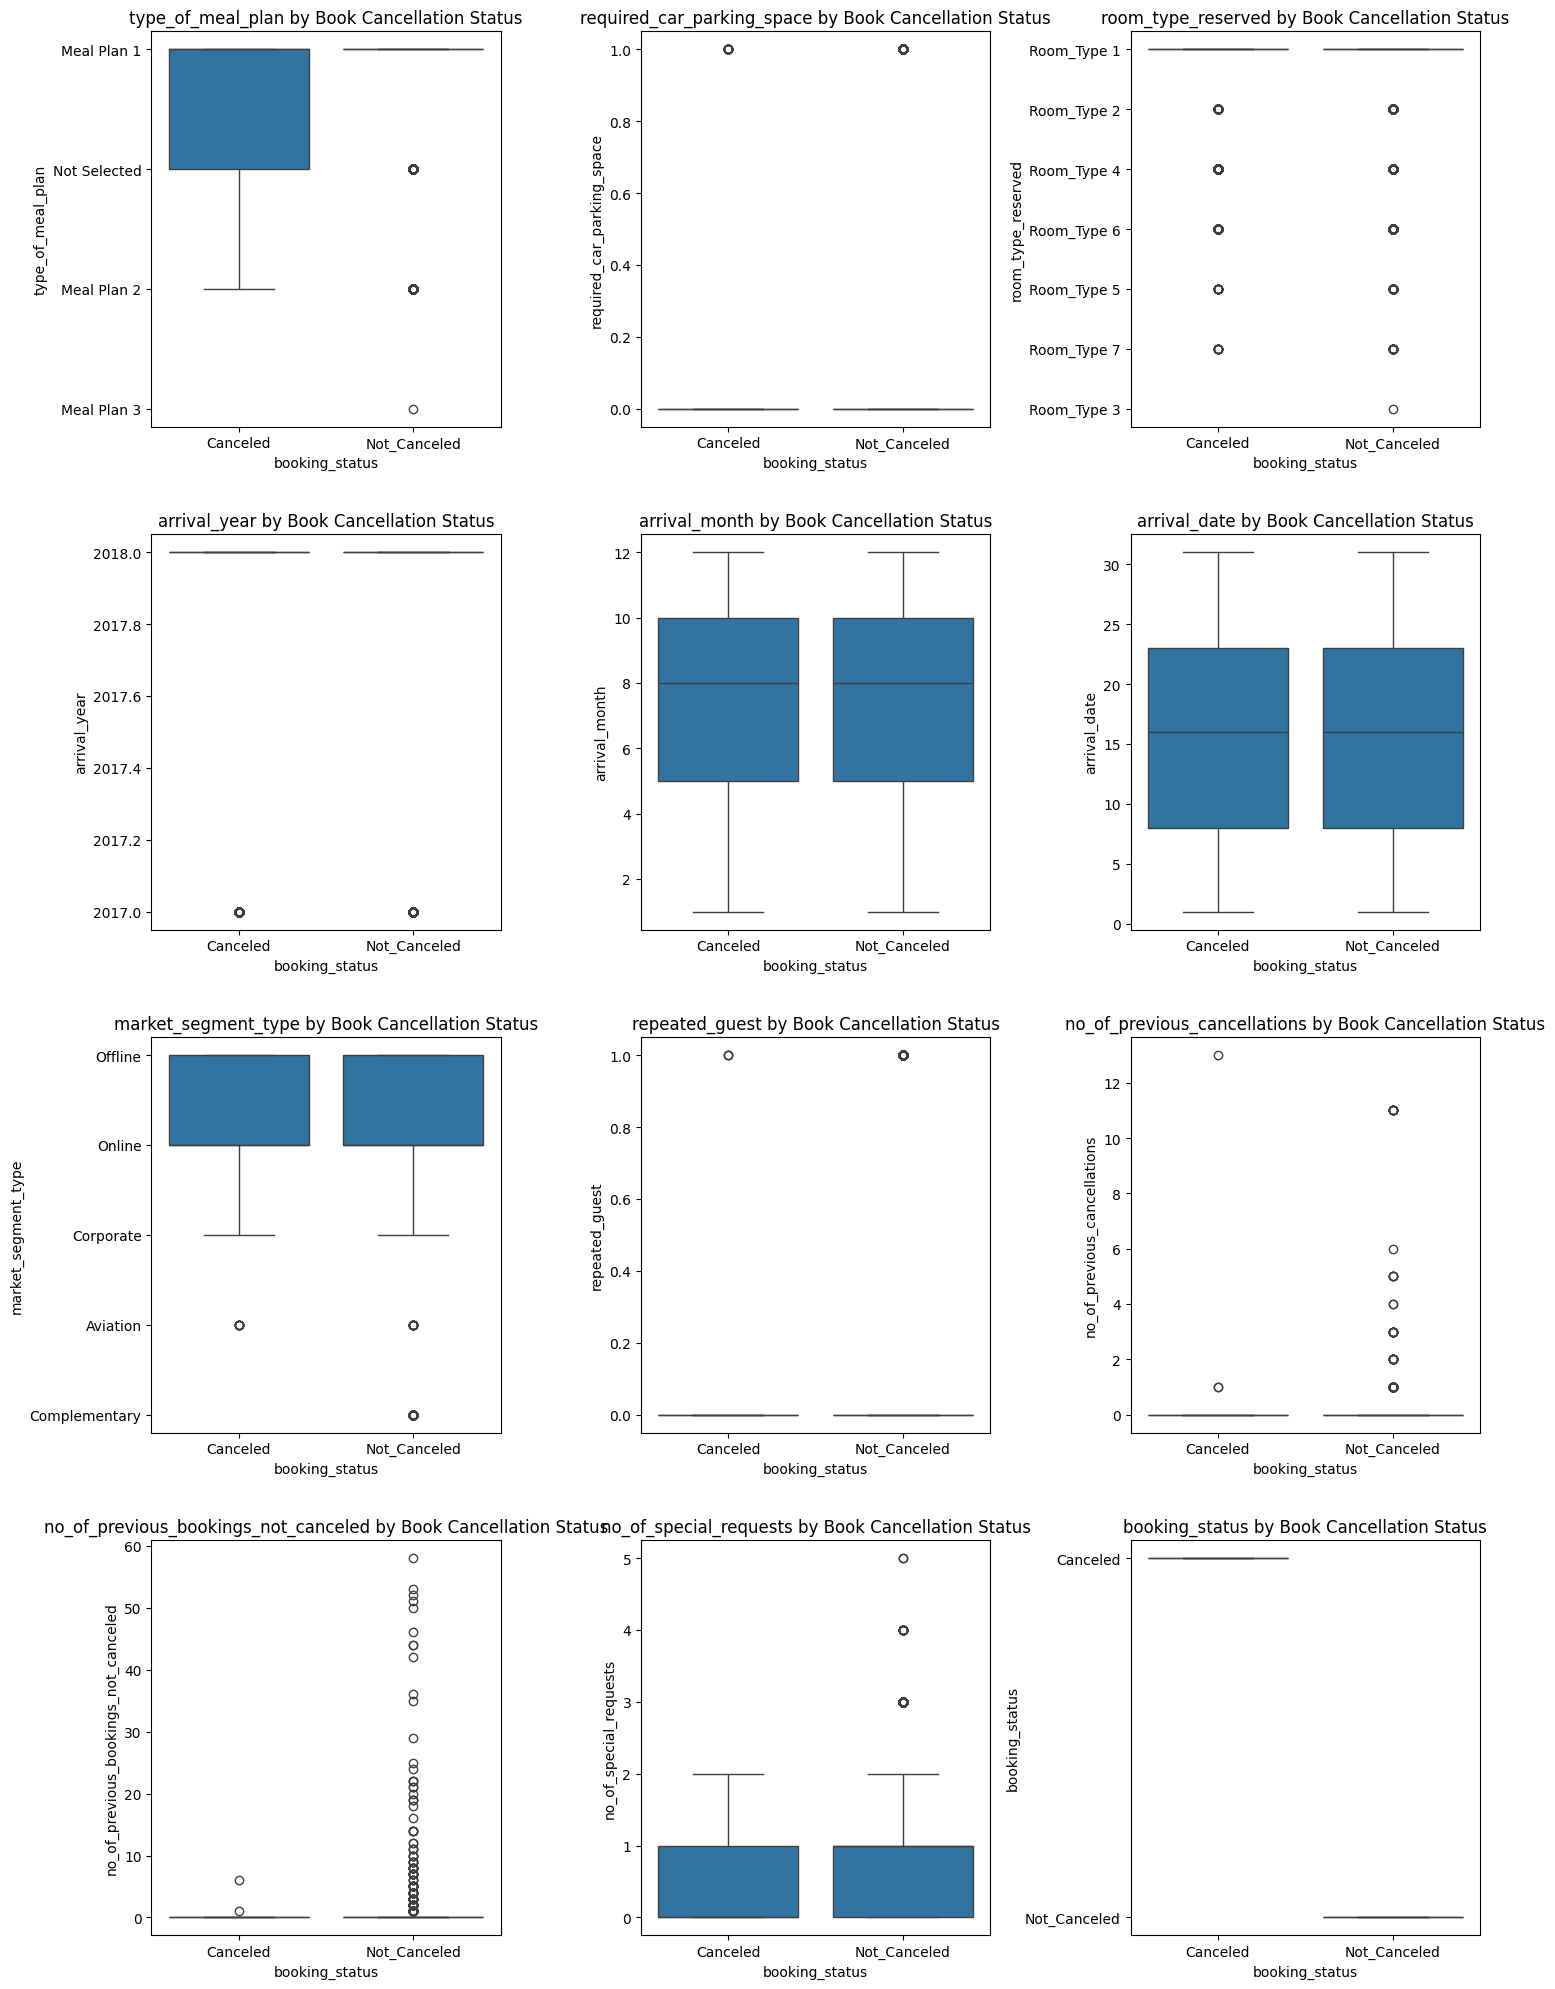

In [173]:
# Get all numeric columns except the ones you want to exclude
countable_columns =  ['type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved',
                        'arrival_year', 'arrival_month', 'arrival_date', 'market_segment_type',
                        'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 
                        'no_of_special_requests', 'booking_status']

# Create subplots
n_cols = len(countable_columns)
fig, axes = plt.subplots(nrows=(n_cols + 2) // 3, ncols=3, figsize=(15, 5 * ((n_cols + 2) // 3)))
axes = axes.flatten()

# Plot box plots for each numeric feature vs overall_health_factor
for i, col in enumerate(countable_columns):
    sns.boxplot(data=df_HotelData_new, x='booking_status', y=col, ax=axes[i])
    axes[i].set_title(f'{col} by Book Cancellation Status')

# Hide unused subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout(h_pad=3)
plt.show()

### <u>**Some basic data analysis of countable/categorical features with boxplots relative to canceled/not canceled**</u>
  
Let's look at each of the features to determine what they look like relative to the canceled/not-canceled
This time we're looking at the countable/categorical features and plotting against booking_status

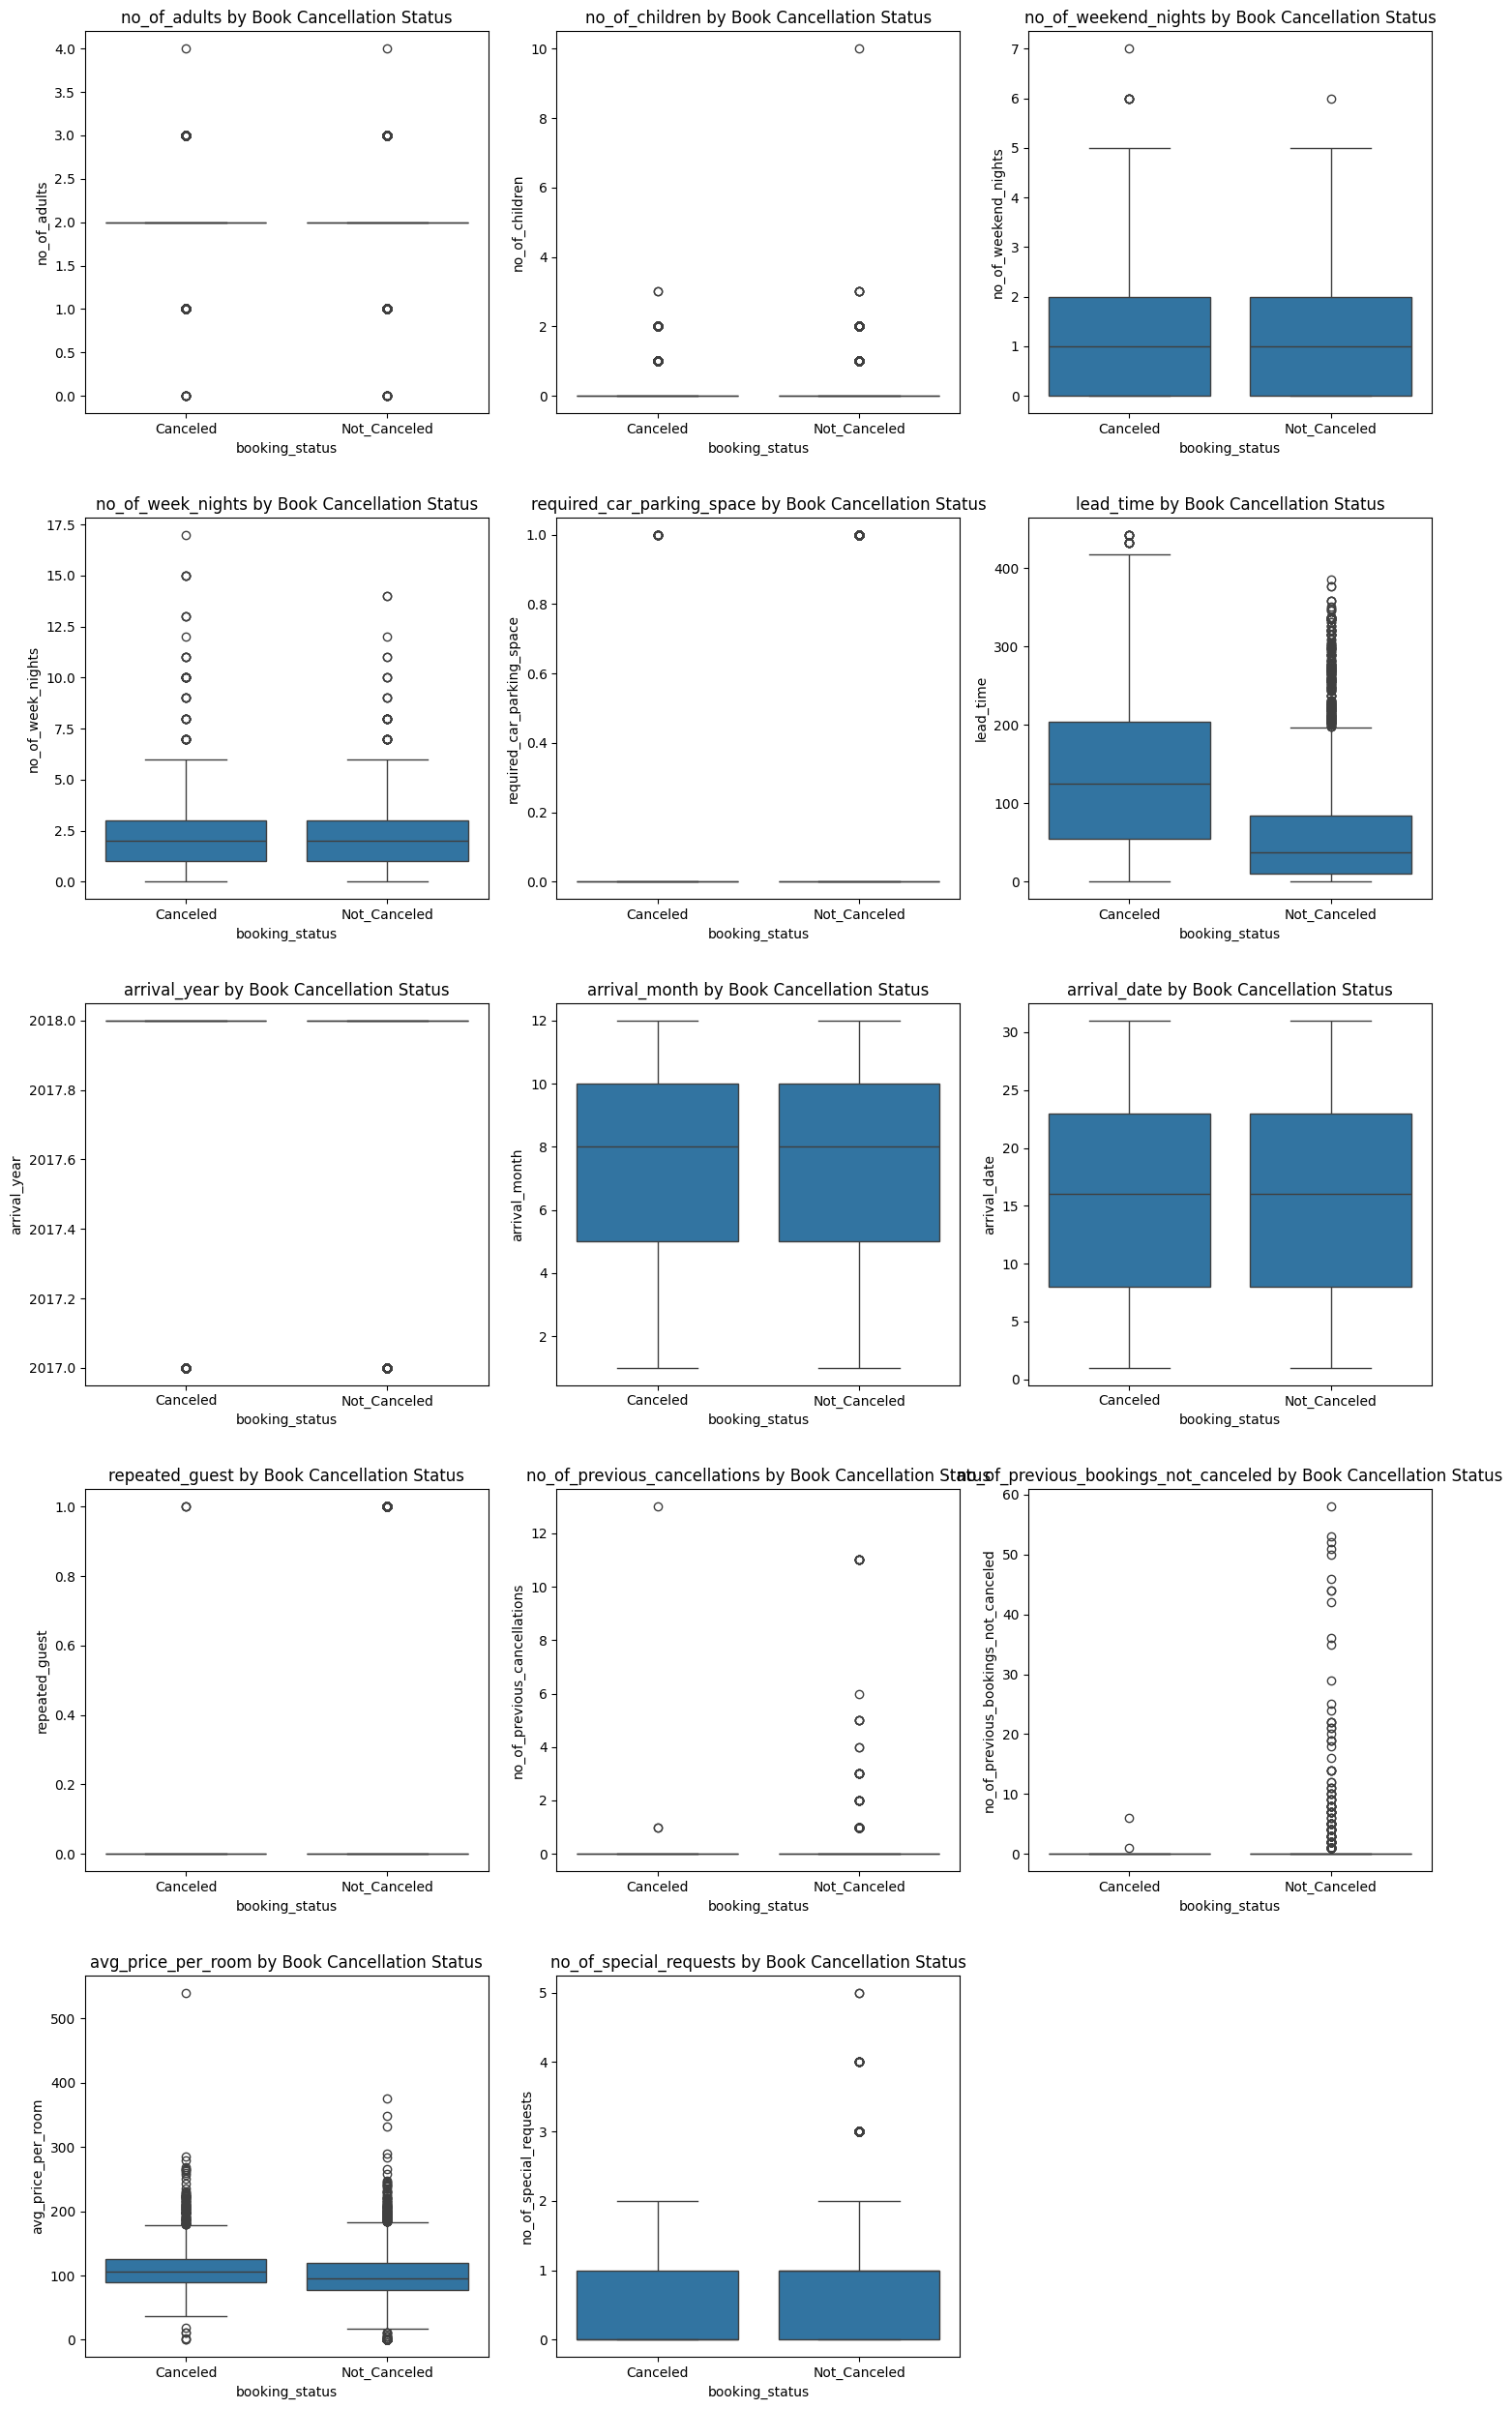

In [174]:
# Get all numeric columns except the ones you want to exclude
numeric_cols = df_HotelData_new.select_dtypes(include=['number']).columns

# Create subplots
n_cols = len(numeric_cols)
fig, axes = plt.subplots(nrows=(n_cols + 2) // 3, ncols=3, figsize=(15, 5 * ((n_cols + 2) // 3)))
axes = axes.flatten()

# Plot box plots for each numeric feature vs overall_health_factor
for i, col in enumerate(numeric_cols):
    sns.boxplot(data=df_HotelData_new, x='booking_status', y=col, ax=axes[i])
    axes[i].set_title(f'{col} by Book Cancellation Status')

# Hide unused subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout(h_pad=3)
plt.show()

### <u>**Analysing the Non-Numeric distributions**</u> ###

We can infer some information based on the above plots.  
1) More women  
2) Other region seems to be most popular in the data  - right skewed, biased by "other"
3) Most people have normal daily activities  
4) Most people same to have average health. Overall Health is right skewed

### <u>**Looking at some interesting comparisons**</u> ###

It would be interesting to plot overall_health_factor, daily_living_activities, region, gender the numeric values  
It would also be worth taking a look at relationships between health factor and region, gender and activities
 

### <u>**Some Analysis of the Distributions**</u>

physician_office_visits:&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;: Right Skew           
nonphysician_office_visits:&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;: Right Skew       
physician_outpatient_visits:&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;: Left Skew -- perhaps Normal  
nonphysician_outpatient_visits:&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;Normal    
emergency_room_visits:&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;Right Skew  
number_of_hospital_stays:&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;Right Skew  
number_of_chronic_conditions:&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;Right Skew         
age:&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;Right Skew       
years_of_education&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;Left Skew - Perhaps Normal  
family_income&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;Right Skew

## <ul>**Analyze Booking Months**</ul> ##

Busy Months: 5002
Quiet Months: 4067
Season Map: <class 'pandas.core.series.Series'>
0        Busy
1       Quiet
2       Quiet
3       Quiet
4        Busy
        ...  
9064    Quiet
9065     Busy
9066    Quiet
9067    Quiet
9068    Quiet
Name: arrival_month, Length: 9069, dtype: object
Season Counts:   season  count  percentage
0   Busy   5002        55.2
1  Quiet   4067        44.8


C:\Users\jxbma\AppData\Local\Temp\ipykernel_15072\2253261613.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=season_counts, x='season', y='count', palette=['#FF6B6B', '#4ECDC4'], ax=ax)


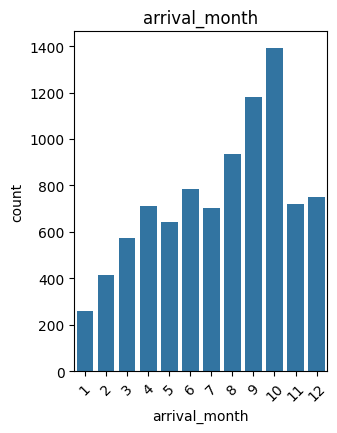

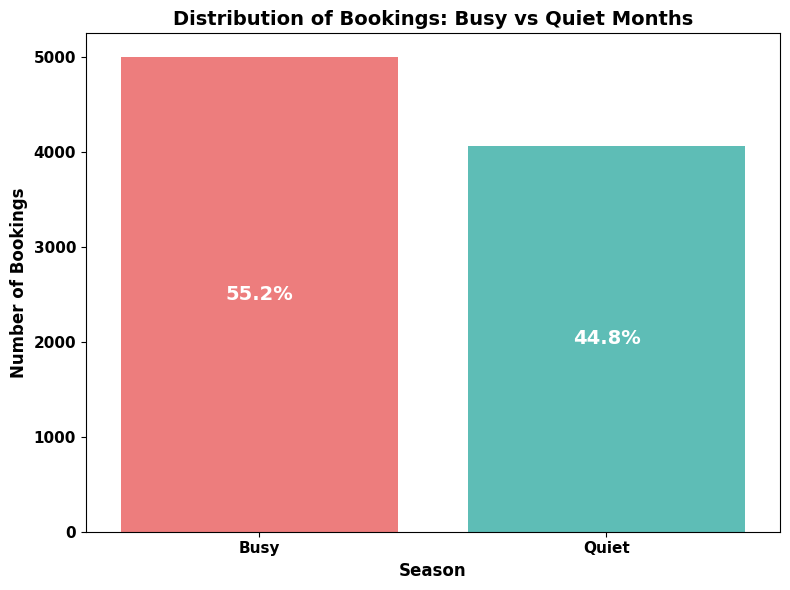

In [175]:
# Figure out the numeric columns
countable_columns =  ['type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved',
                        'arrival_year', 'arrival_month', 'arrival_date', 'market_segment_type',
                        'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 
                        'no_of_special_requests', 'booking_status']
n_cols = len(countable_columns)

# I need a 3X4 plot to display 12 histograms
fig, axes = plt.subplots(nrows=(n_cols + 2) // 4, ncols=4, figsize=(15, 5 * ((n_cols + 2) // 4)))
axes = axes.flatten()

col_index=0
col = 'arrival_month'
sns.countplot(data=df_HotelData_new, x=col, ax=axes[col_index])
axes[col_index].set_title(col)
axes[col_index].tick_params(axis='x', rotation=45)

#sns.countplot(data=df_HotelData_new, x='type_of_meal_plan')

# for i, col in enumerate(countable_columns):
#     print(col)

# Iterate over each numeric column and plot a historbram
# for i, col in enumerate(countable_columns):
#     sns.countplot(data=df_HotelData_new, x=col, ax=axes[i])
#     axes[i].set_title(col)
#     axes[i].tick_params(axis='x', rotation=45)

#Hide the blank/empty graphs
for j in range(col_index + 1, len(axes)):
    axes[j].set_visible(False)

busy_months = ''
quiet_months = ''

busy_months = df_HotelData_new[df_HotelData_new['arrival_month'].isin([6, 7, 8, 9, 10])].shape[0]
quiet_months = df_HotelData_new[~df_HotelData_new['arrival_month'].isin([6, 7, 8, 9, 10])].shape[0]
print(f'Busy Months: {busy_months}')
print(f'Quiet Months: {quiet_months}')

# Create season mapping without modifying df
season_map = df_HotelData_new['arrival_month'].isin([6, 7, 8, 9, 10]).map({True: 'Busy', False: 'Quiet'})
print(f'Season Map: {type(season_map)}')
print(season_map)

# Count and calculate percentages
season_counts = season_map.value_counts().reset_index()
season_counts.columns = ['season', 'count']
season_counts['percentage'] = (season_counts['count'] / season_counts['count'].sum() * 100).round(1)
print(f'Season Counts: {season_counts}')

# Create barplot
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(data=season_counts, x='season', y='count', palette=['#FF6B6B', '#4ECDC4'], ax=ax)

# Add percentage labels
for i, row in season_counts.iterrows():
    ax.text(i, row['count']/2, f"{row['percentage']}%", 
            ha='center', va='center', fontsize=14, fontweight='bold', color='white')

# Bold title and axis labels
ax.set_title('Distribution of Bookings: Busy vs Quiet Months', fontweight='bold', fontsize=14)
ax.set_xlabel('Season', fontweight='bold', fontsize=12)
ax.set_ylabel('Number of Bookings', fontweight='bold', fontsize=12)

# Bold tick labels
ax.tick_params(axis='both', labelsize=11)
for label in ax.get_xticklabels():
    label.set_fontweight('bold')
for label in ax.get_yticklabels():
    label.set_fontweight('bold')


# Make plots more readable and add space
plt.tight_layout(h_pad=5)
plt.show() 

## <ul>**Analyze Busy Season**</ul> ##

C:\Users\jxbma\AppData\Local\Temp\ipykernel_15072\4385126.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=season_counts, x='season', y='count', palette=['#FF6B6B', '#4ECDC4'], ax=ax)


Busy Months: 3512
Quiet Months: 5557
Season Map: <class 'pandas.core.series.Series'>
0       Other
1       Other
2       Other
3       Other
4       Other
        ...  
9064    Other
9065     Peak
9066    Other
9067    Other
9068    Other
Name: arrival_month, Length: 9069, dtype: object
Season Counts:   season  count  percentage
0  Other   5557        61.3
1   Peak   3512        38.7


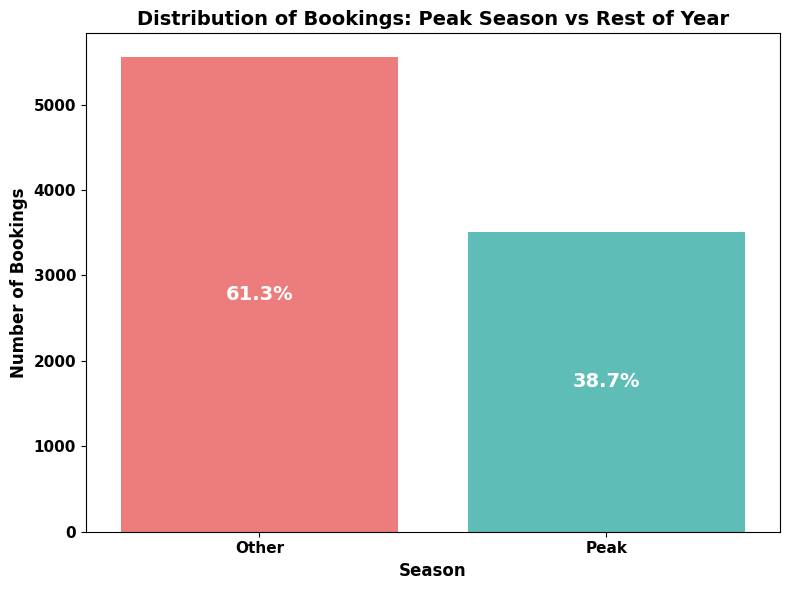

In [176]:
busy_months = df_HotelData_new[df_HotelData_new['arrival_month'].isin([8, 9, 10])].shape[0]
quiet_months = df_HotelData_new[~df_HotelData_new['arrival_month'].isin([8, 9, 10])].shape[0]
print(f'Busy Months: {busy_months}')
print(f'Quiet Months: {quiet_months}')

# Create season mapping without modifying df
season_map = df_HotelData_new['arrival_month'].isin([8, 9, 10]).map({True: 'Peak', False: 'Other'})
print(f'Season Map: {type(season_map)}')
print(season_map)

# Count and calculate percentages
season_counts = season_map.value_counts().reset_index()
season_counts.columns = ['season', 'count']
season_counts['percentage'] = (season_counts['count'] / season_counts['count'].sum() * 100).round(1)
print(f'Season Counts: {season_counts}')

# Create barplot
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(data=season_counts, x='season', y='count', palette=['#FF6B6B', '#4ECDC4'], ax=ax)

# Add percentage labels
for i, row in season_counts.iterrows():
    ax.text(i, row['count']/2, f"{row['percentage']}%", 
            ha='center', va='center', fontsize=14, fontweight='bold', color='white')

# Bold title and axis labels
ax.set_title('Distribution of Bookings: Peak Season vs Rest of Year', fontweight='bold', fontsize=14)
ax.set_xlabel('Season', fontweight='bold', fontsize=12)
ax.set_ylabel('Number of Bookings', fontweight='bold', fontsize=12)

# Bold tick labels
ax.tick_params(axis='both', labelsize=11)
for label in ax.get_xticklabels():
    label.set_fontweight('bold')
for label in ax.get_yticklabels():
    label.set_fontweight('bold')


# Make plots more readable and add space
plt.tight_layout(h_pad=5)
plt.show() 

## <ul>**Analyze Number of Adult And Children Guests**</ul> ##

C:\Users\jxbma\AppData\Local\Temp\ipykernel_15072\653361435.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_HotelData_new, x='no_of_adults', palette='Set2', ax=ax)


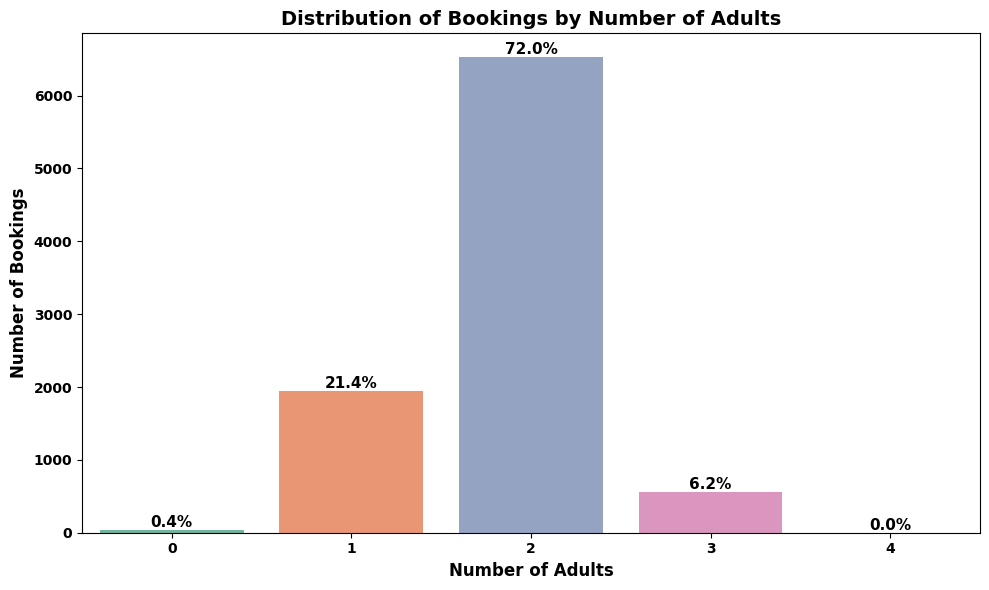

In [177]:
# Countplot for adults only
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(data=df_HotelData_new, x='no_of_adults', palette='Set2', ax=ax)

# Calculate percentages
adult_counts = df_HotelData_new['no_of_adults'].value_counts()
total = len(df_HotelData_new)

for i, val in enumerate(sorted(df_HotelData_new['no_of_adults'].unique())):
    count = (df_HotelData_new['no_of_adults'] == val).sum()
    pct = (count / total * 100)
    ax.text(i, count, f"{pct:.1f}%", 
            ha='center', va='bottom', fontsize=11, fontweight='bold')

ax.set_title('Distribution of Bookings by Number of Adults', fontweight='bold', fontsize=14)
ax.set_xlabel('Number of Adults', fontweight='bold', fontsize=12)
ax.set_ylabel('Number of Bookings', fontweight='bold', fontsize=12)

# Bold tick labels
for label in ax.get_xticklabels():
    label.set_fontweight('bold')
for label in ax.get_yticklabels():
    label.set_fontweight('bold')

plt.tight_layout()
plt.show()

C:\Users\jxbma\AppData\Local\Temp\ipykernel_15072\3282644408.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_HotelData_new, x='no_of_children', palette='Set2', ax=ax)


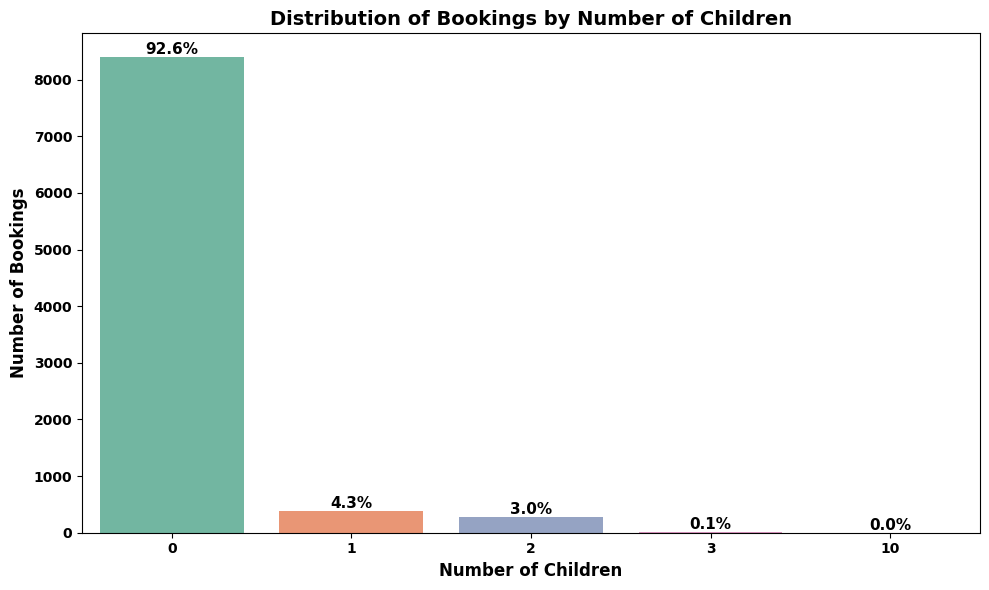

In [178]:
# Countplot for adults only
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(data=df_HotelData_new, x='no_of_children', palette='Set2', ax=ax)

# Calculate percentages
adult_counts = df_HotelData_new['no_of_children'].value_counts()
total = len(df_HotelData_new)

for i, val in enumerate(sorted(df_HotelData_new['no_of_children'].unique())):
    count = (df_HotelData_new['no_of_children'] == val).sum()
    pct = (count / total * 100)
    ax.text(i, count, f"{pct:.1f}%", 
            ha='center', va='bottom', fontsize=11, fontweight='bold')

ax.set_title('Distribution of Bookings by Number of Children', fontweight='bold', fontsize=14)
ax.set_xlabel('Number of Children', fontweight='bold', fontsize=12)
ax.set_ylabel('Number of Bookings', fontweight='bold', fontsize=12)

# Bold tick labels
for label in ax.get_xticklabels():
    label.set_fontweight('bold')
for label in ax.get_yticklabels():
    label.set_fontweight('bold')

plt.tight_layout()
plt.show()

C:\Users\jxbma\AppData\Local\Temp\ipykernel_15072\3734327546.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=total_guests, palette='viridis', ax=ax, order=sorted(total_guests.unique()))


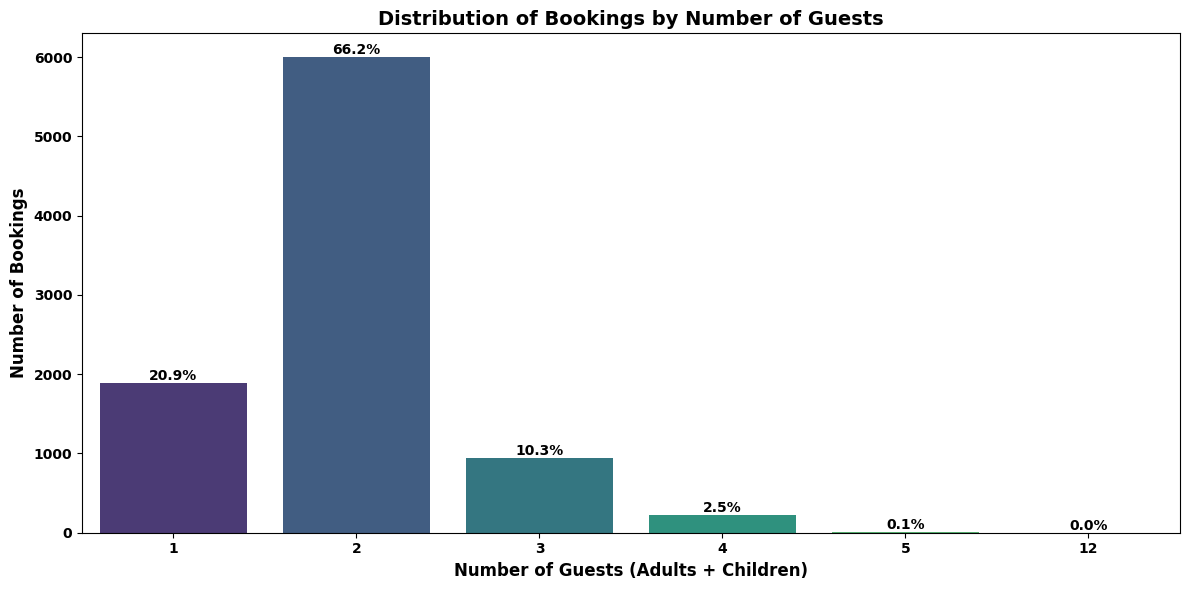


Guest Distribution Summary:
   num_guests  count  percentage
0           1   1895        20.9
1           2   6001        66.2
2           3    937        10.3
3           4    229         2.5
4           5      6         0.1
5          12      1         0.0

Most common: 2 guests


In [179]:
# Calculate total number of guests (adults + children)
total_guests = df_HotelData_new['no_of_adults'] + df_HotelData_new['no_of_children']

# Count and calculate percentages
guest_counts = total_guests.value_counts().sort_index().reset_index()
guest_counts.columns = ['num_guests', 'count']
guest_counts['percentage'] = (guest_counts['count'] / guest_counts['count'].sum() * 100).round(1)

# Create countplot
fig, ax = plt.subplots(figsize=(12, 6))
sns.countplot(x=total_guests, palette='viridis', ax=ax, order=sorted(total_guests.unique()))

# Add percentage labels on bars
for i, num in enumerate(sorted(total_guests.unique())):
    count = (total_guests == num).sum()
    pct = (count / len(total_guests) * 100)
    ax.text(i, count, f"{pct:.1f}%", 
            ha='center', va='bottom', fontsize=10, fontweight='bold')

# Bold title and axis labels
ax.set_title('Distribution of Bookings by Number of Guests', fontweight='bold', fontsize=14)
ax.set_xlabel('Number of Guests (Adults + Children)', fontweight='bold', fontsize=12)
ax.set_ylabel('Number of Bookings', fontweight='bold', fontsize=12)

# Bold tick labels
for label in ax.get_xticklabels():
    label.set_fontweight('bold')
for label in ax.get_yticklabels():
    label.set_fontweight('bold')

plt.tight_layout()
plt.show()

# Print summary
print("\nGuest Distribution Summary:")
print(guest_counts[['num_guests', 'count', 'percentage']])
print(f"\nMost common: {total_guests.mode()[0]} guests")

## <ul>**Analyze Number of Nights Booked**</ul> ##

C:\Users\jxbma\AppData\Local\Temp\ipykernel_15072\916499843.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_HotelData_new, x='no_of_week_nights', palette='viridis', ax=ax,


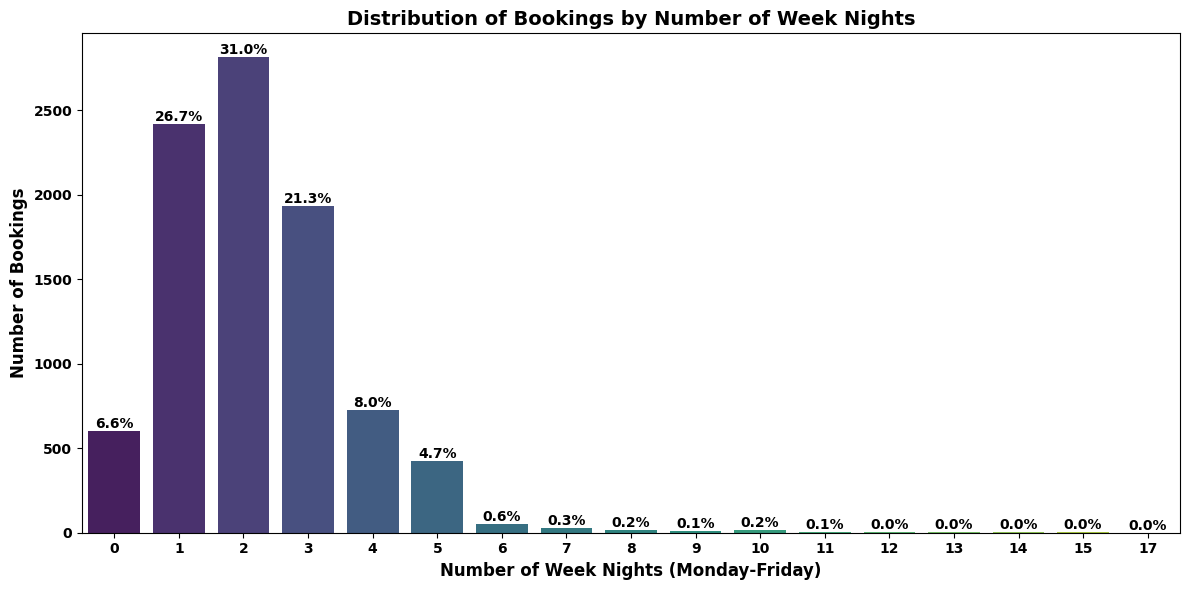

In [180]:
# Count and calculate percentages for week nights
weeknight_counts = df_HotelData_new['no_of_week_nights'].value_counts().sort_index().reset_index()
weeknight_counts.columns = ['num_nights', 'count']
weeknight_counts['percentage'] = (weeknight_counts['count'] / weeknight_counts['count'].sum() * 100).round(1)

# Create countplot
fig, ax = plt.subplots(figsize=(12, 6))
sns.countplot(data=df_HotelData_new, x='no_of_week_nights', palette='viridis', ax=ax, 
              order=sorted(df_HotelData_new['no_of_week_nights'].unique()))

# Add percentage labels on bars
for i, val in enumerate(sorted(df_HotelData_new['no_of_week_nights'].unique())):
    count = (df_HotelData_new['no_of_week_nights'] == val).sum()
    pct = (count / len(df_HotelData_new) * 100)
    ax.text(i, count, f"{pct:.1f}%", 
            ha='center', va='bottom', fontsize=10, fontweight='bold')

# Bold title and axis labels
ax.set_title('Distribution of Bookings by Number of Week Nights', fontweight='bold', fontsize=14)
ax.set_xlabel('Number of Week Nights (Monday-Friday)', fontweight='bold', fontsize=12)
ax.set_ylabel('Number of Bookings', fontweight='bold', fontsize=12)

# Bold tick labels
for label in ax.get_xticklabels():
    label.set_fontweight('bold')
for label in ax.get_yticklabels():
    label.set_fontweight('bold')

plt.tight_layout()
plt.show()

C:\Users\jxbma\AppData\Local\Temp\ipykernel_15072\1506236722.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_HotelData_new, x='no_of_weekend_nights', palette='Set2', ax=ax,


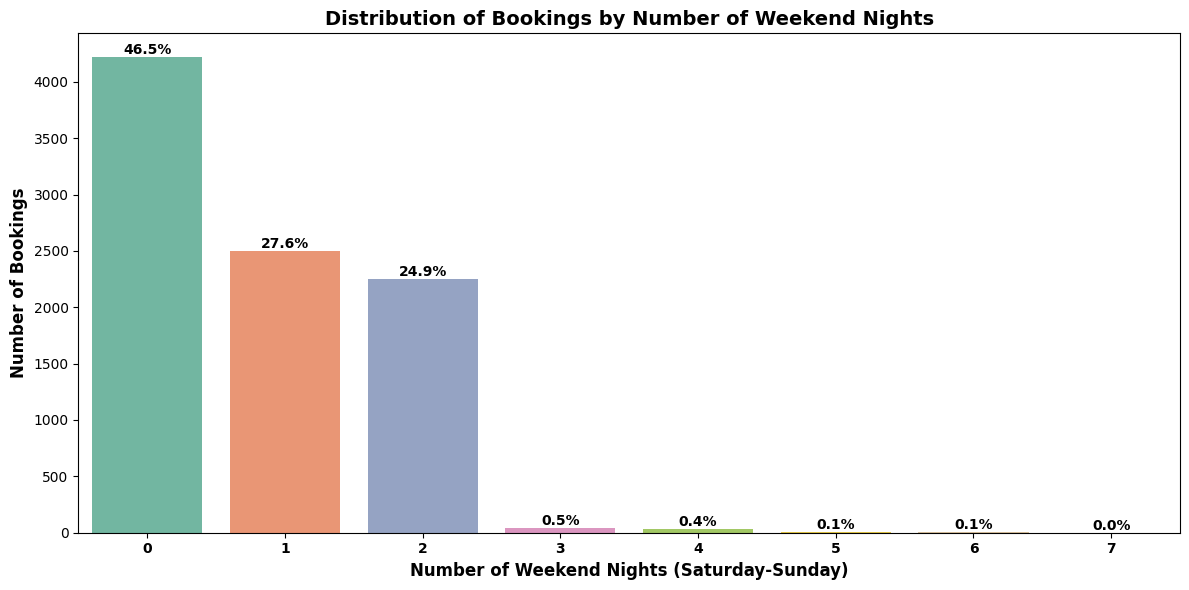


Weekend Nights Summary:
Most common: 0 nights
Average: 0.81 nights
Median: 1 nights


In [181]:
weekend_counts = df_HotelData_new['no_of_weekend_nights'].value_counts().sort_index().reset_index()
weekend_counts.columns = ['num_nights', 'count']
weekend_counts['percentage'] = (weekend_counts['count'] / weekend_counts['count'].sum() * 100).round(1)

# Create countplot
fig, ax = plt.subplots(figsize=(12, 6))
sns.countplot(data=df_HotelData_new, x='no_of_weekend_nights', palette='Set2', ax=ax, 
              order=sorted(df_HotelData_new['no_of_weekend_nights'].unique()))

# Add percentage labels on bars
for i, val in enumerate(sorted(df_HotelData_new['no_of_weekend_nights'].unique())):
    count = (df_HotelData_new['no_of_weekend_nights'] == val).sum()
    pct = (count / len(df_HotelData_new) * 100)
    ax.text(i, count, f"{pct:.1f}%", 
            ha='center', va='bottom', fontsize=10, fontweight='bold')

# Bold title and axis labels
ax.set_title('Distribution of Bookings by Number of Weekend Nights', fontweight='bold', fontsize=14)
ax.set_xlabel('Number of Weekend Nights (Saturday-Sunday)', fontweight='bold', fontsize=12)
ax.set_ylabel('Number of Bookings', fontweight='bold', fontsize=12)

# Bold tick labels
for label in ax.get_xticklabels():
    label.set_fontweight('bold')
for label in ax.get_yticklabels():
    label.set_fontweight=('bold')

plt.tight_layout()
plt.show()

# Print summary
print("\nWeekend Nights Summary:")
print(f"Most common: {df_HotelData_new['no_of_weekend_nights'].mode()[0]} nights")
print(f"Average: {df_HotelData_new['no_of_weekend_nights'].mean():.2f} nights")
print(f"Median: {df_HotelData_new['no_of_weekend_nights'].median():.0f} nights")

C:\Users\jxbma\AppData\Local\Temp\ipykernel_15072\3717318258.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=total_nights, palette='viridis', ax=ax, order=sorted(total_nights.unique()))


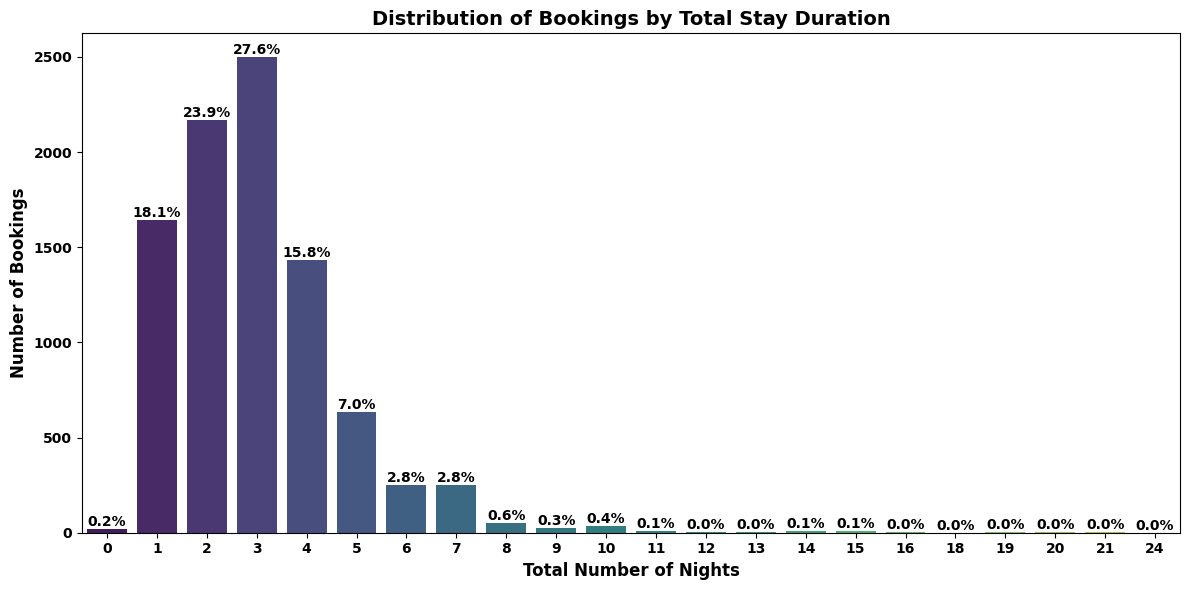


Total Stay Duration Summary:
Most common: 3 nights
Average: 3.02 nights
Median: 3 nights
Min: 0 nights
Max: 24 nights


In [182]:
# Calculate total nights (week nights + weekend nights)
total_nights = df_HotelData_new['no_of_week_nights'] + df_HotelData_new['no_of_weekend_nights']

# Count and calculate percentages
nights_counts = total_nights.value_counts().sort_index().reset_index()
nights_counts.columns = ['num_nights', 'count']
nights_counts['percentage'] = (nights_counts['count'] / nights_counts['count'].sum() * 100).round(1)

# Create countplot
fig, ax = plt.subplots(figsize=(12, 6))
sns.countplot(x=total_nights, palette='viridis', ax=ax, order=sorted(total_nights.unique()))

# Add percentage labels on bars
for i, val in enumerate(sorted(total_nights.unique())):
    count = (total_nights == val).sum()
    pct = (count / len(total_nights) * 100)
    ax.text(i, count, f"{pct:.1f}%", 
            ha='center', va='bottom', fontsize=10, fontweight='bold')

# Bold title and axis labels
ax.set_title('Distribution of Bookings by Total Stay Duration', fontweight='bold', fontsize=14)
ax.set_xlabel('Total Number of Nights', fontweight='bold', fontsize=12)
ax.set_ylabel('Number of Bookings', fontweight='bold', fontsize=12)

# Bold tick labels
for label in ax.get_xticklabels():
    label.set_fontweight('bold')
for label in ax.get_yticklabels():
    label.set_fontweight('bold')

plt.tight_layout()
plt.show()

# Print summary
print("\nTotal Stay Duration Summary:")
print(f"Most common: {total_nights.mode()[0]} nights")
print(f"Average: {total_nights.mean():.2f} nights")
print(f"Median: {total_nights.median():.0f} nights")
print(f"Min: {total_nights.min()} nights")
print(f"Max: {total_nights.max()} nights")

C:\Users\jxbma\AppData\Local\Temp\ipykernel_15072\2497340664.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bin_counts, x='nights_bin', y='count', palette='viridis', ax=ax)


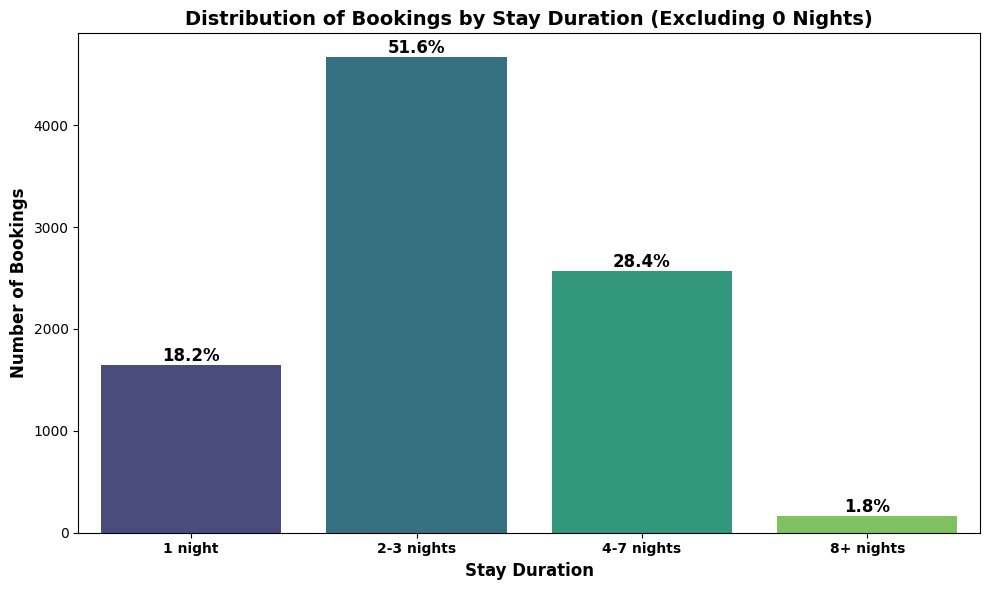


Stay Duration Distribution (Excluding 0 Nights):
1 night: 1643 bookings (18.2%)
2-3 nights: 4669 bookings (51.6%)
4-7 nights: 2571 bookings (28.4%)
8+ nights: 164 bookings (1.8%)

Total bookings analyzed: 9047
Bookings excluded (0 nights): 22


In [183]:
# Calculate total nights (week nights + weekend nights)
total_nights = df_HotelData_new['no_of_week_nights'] + df_HotelData_new['no_of_weekend_nights']

# Filter out 0 nights
total_nights_filtered = total_nights[total_nights > 0]

# Create bins
bins = [0, 1, 3, 7, total_nights_filtered.max() + 1]
labels = ['1 night', '2-3 nights', '4-7 nights', '8+ nights']

# Bin the data
nights_binned = pd.cut(total_nights_filtered, bins=bins, labels=labels, right=True)

# Count and calculate percentages
bin_counts = nights_binned.value_counts().reindex(labels).reset_index()
bin_counts.columns = ['nights_bin', 'count']
bin_counts['percentage'] = (bin_counts['count'] / bin_counts['count'].sum() * 100).round(1)

# Create barplot
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data=bin_counts, x='nights_bin', y='count', palette='viridis', ax=ax)

# Add percentage labels on bars
for i, row in bin_counts.iterrows():
    ax.text(i, row['count'], f"{row['percentage']}%", 
            ha='center', va='bottom', fontsize=12, fontweight='bold')

# Bold title and axis labels
ax.set_title('Distribution of Bookings by Stay Duration (Excluding 0 Nights)', 
             fontweight='bold', fontsize=14)
ax.set_xlabel('Stay Duration', fontweight='bold', fontsize=12)
ax.set_ylabel('Number of Bookings', fontweight='bold', fontsize=12)

# Bold tick labels
for label in ax.get_xticklabels():
    label.set_fontweight('bold')
for label in ax.get_yticklabels():
    label.set_fontweight=('bold')

plt.tight_layout()
plt.show()

# Print summary
print("\nStay Duration Distribution (Excluding 0 Nights):")
for _, row in bin_counts.iterrows():
    print(f"{row['nights_bin']}: {row['count']} bookings ({row['percentage']}%)")
print(f"\nTotal bookings analyzed: {len(total_nights_filtered)}")
print(f"Bookings excluded (0 nights): {(total_nights == 0).sum()}")





## <ul>**Analyze Parking Preferences**</ul> ##

C:\Users\jxbma\AppData\Local\Temp\ipykernel_15072\1672167154.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=parking_counts, x='parking', y='count', palette=['#4ECDC4', '#FF6B6B'], ax=ax)


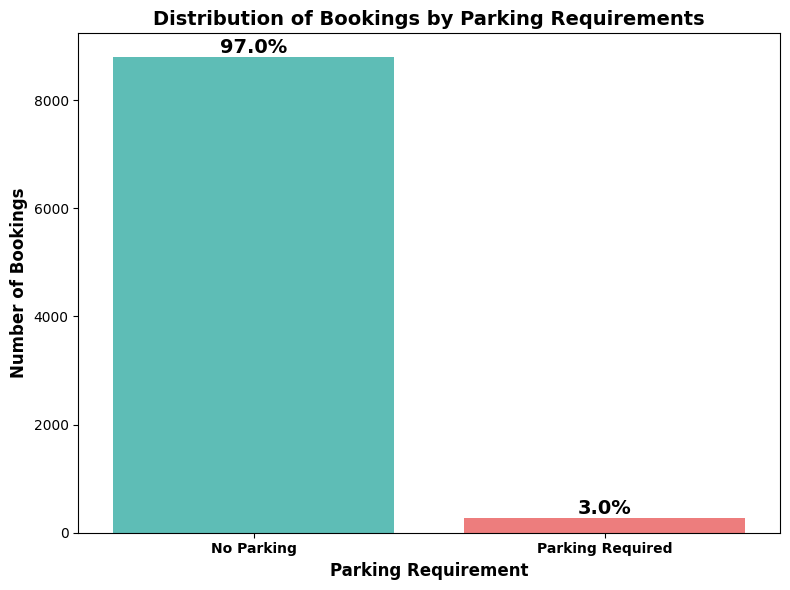


Parking Summary:
No Parking: 8795 (97.0%)
Parking Required: 274 (3.0%)


In [184]:
## Map 0/1 to readable labels
parking_labels = df_HotelData_new['required_car_parking_space'].map({0: 'No Parking', 1: 'Parking Required'})

# Count and calculate percentages
parking_counts = parking_labels.value_counts().reset_index()
parking_counts.columns = ['parking', 'count']
parking_counts['percentage'] = (parking_counts['count'] / parking_counts['count'].sum() * 100).round(1)

# Create countplot
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(data=parking_counts, x='parking', y='count', palette=['#4ECDC4', '#FF6B6B'], ax=ax)

# Add percentage labels
for i, row in parking_counts.iterrows():
    ax.text(i, row['count'], f"{row['percentage']}%", 
            ha='center', va='bottom', fontsize=14, fontweight='bold')

ax.set_title('Distribution of Bookings by Parking Requirements', fontweight='bold', fontsize=14)
ax.set_xlabel('Parking Requirement', fontweight='bold', fontsize=12)
ax.set_ylabel('Number of Bookings', fontweight='bold', fontsize=12)

# Bold tick labels
for label in ax.get_xticklabels():
    label.set_fontweight('bold')
for label in ax.get_yticklabels():
    label.set_fontweight=('bold')

plt.tight_layout()
plt.show()

print("\nParking Summary:")
for _, row in parking_counts.iterrows():
    print(f"{row['parking']}: {row['count']} ({row['percentage']}%)")

## <ul>**Analyze Number of Special Requests**</ul> ##

C:\Users\jxbma\AppData\Local\Temp\ipykernel_15072\3932226992.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_HotelData_new, x='no_of_special_requests', palette='viridis', ax=ax,


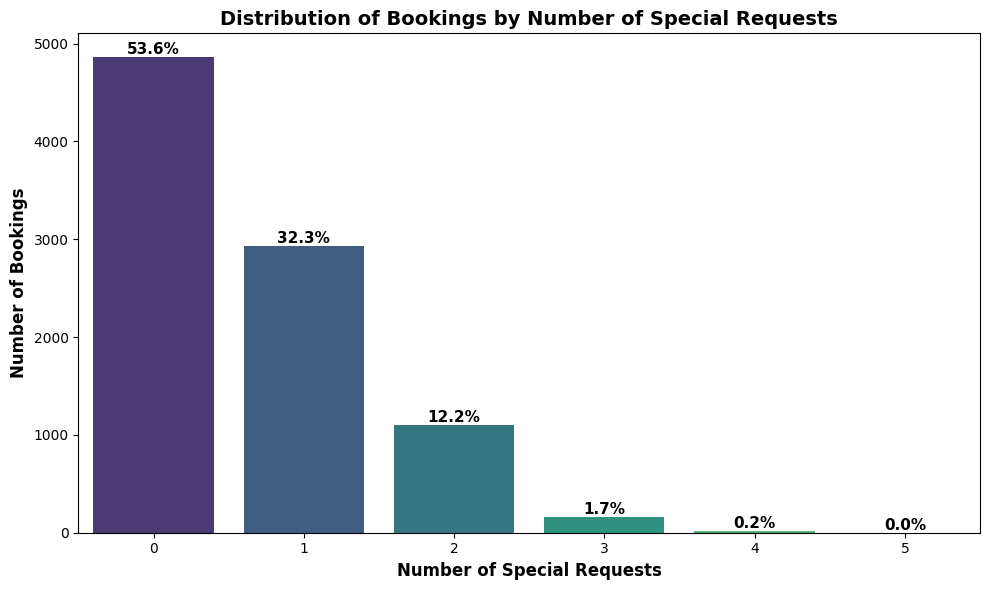


Special Requests Summary:
Most common: 0 requests
Average: 0.63 requests
Max: 5 requests


In [185]:
# Create countplot for special requests
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(data=df_HotelData_new, x='no_of_special_requests', palette='viridis', ax=ax,
              order=sorted(df_HotelData_new['no_of_special_requests'].unique()))

# Add percentage labels
for i, val in enumerate(sorted(df_HotelData_new['no_of_special_requests'].unique())):
    count = (df_HotelData_new['no_of_special_requests'] == val).sum()
    pct = (count / len(df_HotelData_new) * 100)
    ax.text(i, count, f"{pct:.1f}%", 
            ha='center', va='bottom', fontsize=11, fontweight='bold')

ax.set_title('Distribution of Bookings by Number of Special Requests', fontweight='bold', fontsize=14)
ax.set_xlabel('Number of Special Requests', fontweight='bold', fontsize=12)
ax.set_ylabel('Number of Bookings', fontweight='bold', fontsize=12)

# Bold tick labels
for label in ax.get_xticklabels():
    label.set_fontweight=('bold')
for label in ax.get_yticklabels():
    label.set_fontweight=('bold')

plt.tight_layout()
plt.show()

print("\nSpecial Requests Summary:")
print(f"Most common: {df_HotelData_new['no_of_special_requests'].mode()[0]} requests")
print(f"Average: {df_HotelData_new['no_of_special_requests'].mean():.2f} requests")
print(f"Max: {df_HotelData_new['no_of_special_requests'].max()} requests")

## <ul>**Analyze Room Type**</ul> ##

C:\Users\jxbma\AppData\Local\Temp\ipykernel_15072\1646938877.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_HotelData_new, x='room_type_reserved', palette='Set2', ax=ax,


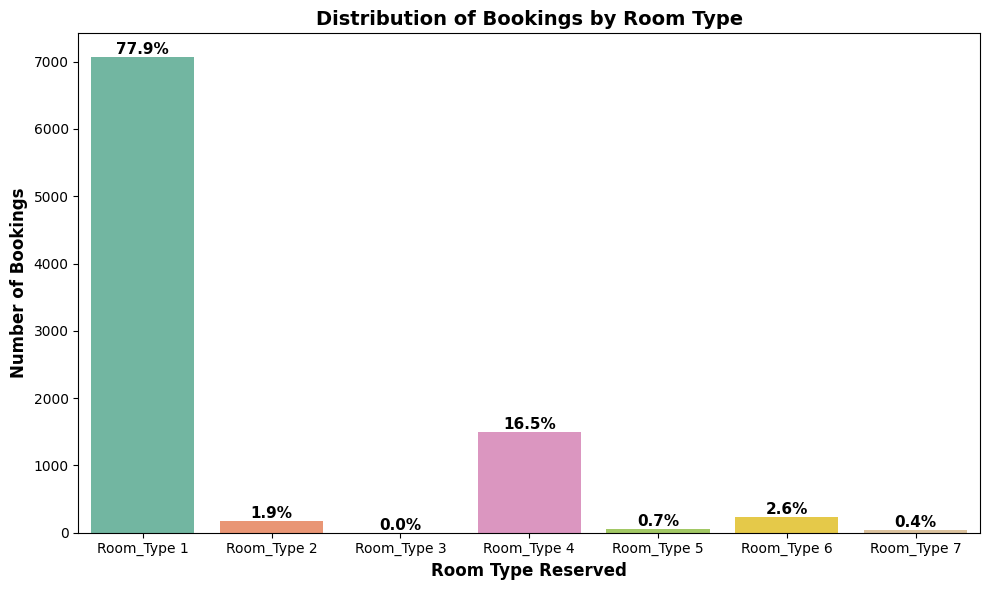


Room Type Summary:
Room Type Room_Type 1: 7068 (77.9%)
Room Type Room_Type 2: 171 (1.9%)
Room Type Room_Type 3: 1 (0.0%)
Room Type Room_Type 4: 1492 (16.5%)
Room Type Room_Type 5: 60 (0.7%)
Room Type Room_Type 6: 239 (2.6%)
Room Type Room_Type 7: 38 (0.4%)


In [186]:
# Count and calculate percentages for room type
room_counts = df_HotelData_new['room_type_reserved'].value_counts().sort_index().reset_index()
room_counts.columns = ['room_type', 'count']
room_counts['percentage'] = (room_counts['count'] / room_counts['count'].sum() * 100).round(1)

# Create countplot
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(data=df_HotelData_new, x='room_type_reserved', palette='Set2', ax=ax,
              order=sorted(df_HotelData_new['room_type_reserved'].unique()))

# Add percentage labels
for i, val in enumerate(sorted(df_HotelData_new['room_type_reserved'].unique())):
    count = (df_HotelData_new['room_type_reserved'] == val).sum()
    pct = (count / len(df_HotelData_new) * 100)
    ax.text(i, count, f"{pct:.1f}%", 
            ha='center', va='bottom', fontsize=11, fontweight='bold')

ax.set_title('Distribution of Bookings by Room Type', fontweight='bold', fontsize=14)
ax.set_xlabel('Room Type Reserved', fontweight='bold', fontsize=12)
ax.set_ylabel('Number of Bookings', fontweight='bold', fontsize=12)

# Bold tick labels
for label in ax.get_xticklabels():
    label.set_fontweight=('bold')
for label in ax.get_yticklabels():
    label.set_fontweight=('bold')

plt.tight_layout()
plt.show()

print("\nRoom Type Summary:")
for _, row in room_counts.iterrows():
    print(f"Room Type {row['room_type']}: {row['count']} ({row['percentage']}%)")


## <ul>**Analyze Number Preivious Bookings/Cancellations**</ul> ##

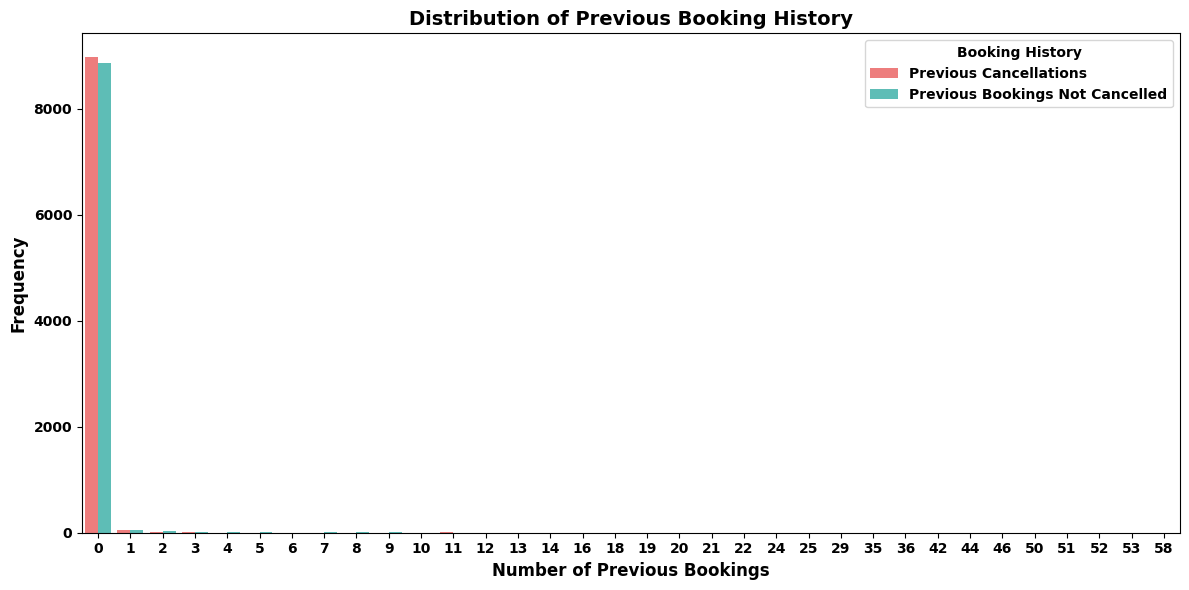

C:\Users\jxbma\AppData\Local\Temp\ipykernel_15072\3600378280.py:73: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


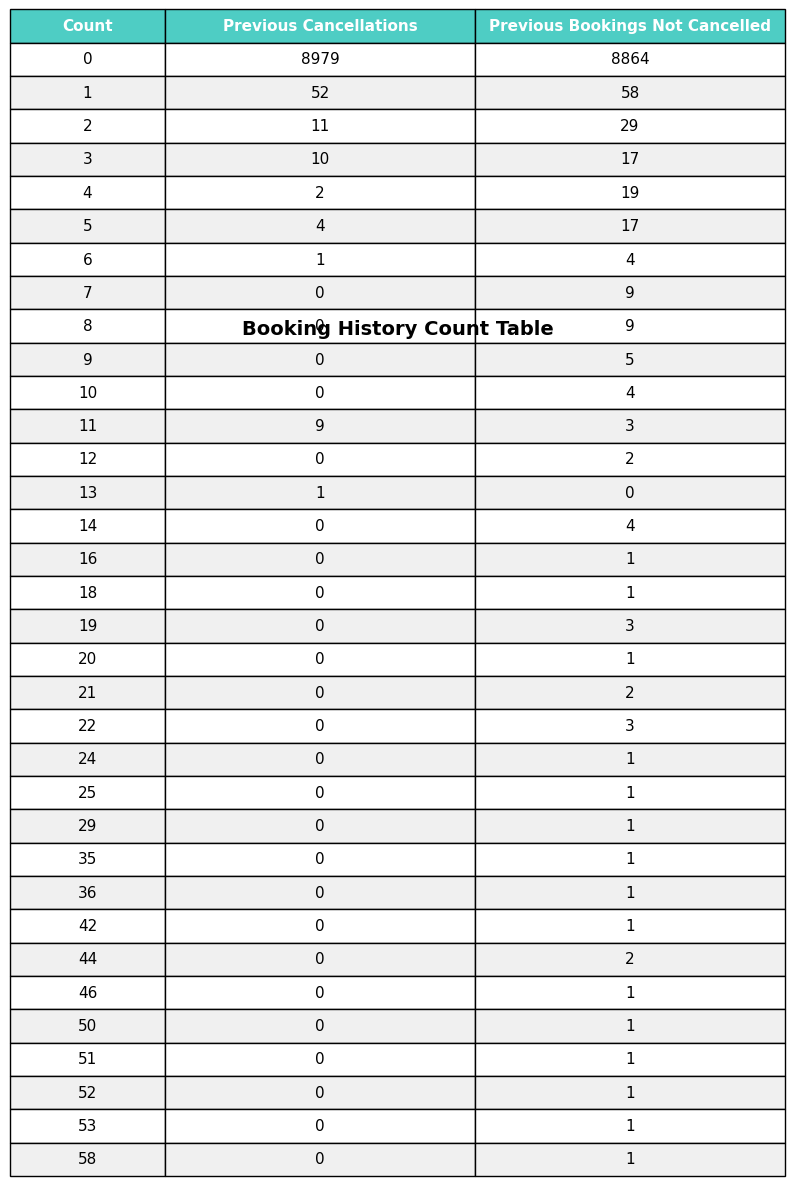

In [187]:
# Melt the dataframe to get both columns in long format for plotting
plot_data = pd.melt(df_HotelData_new, value_vars=['no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled'],
                    var_name='Booking_History', value_name='Count')

# Map column names to readable labels
plot_data['Booking_History'] = plot_data['Booking_History'].map({
    'no_of_previous_cancellations': 'Previous Cancellations',
    'no_of_previous_bookings_not_canceled': 'Previous Bookings Not Cancelled'
})

# Create countplot
fig, ax = plt.subplots(figsize=(12, 6))
sns.countplot(data=plot_data, x='Count', hue='Booking_History', 
              palette=['#FF6B6B', '#4ECDC4'], ax=ax)

# Bold title and axis labels
ax.set_title('Distribution of Previous Booking History', fontweight='bold', fontsize=14)
ax.set_xlabel('Number of Previous Bookings', fontweight='bold', fontsize=12)
ax.set_ylabel('Frequency', fontweight='bold', fontsize=12)

# Bold tick labels
for label in ax.get_xticklabels():
    label.set_fontweight('bold')
for label in ax.get_yticklabels():
    label.set_fontweight('bold')

# Bold legend
ax.legend(title='Booking History', title_fontproperties={'weight': 'bold'}, prop={'weight': 'bold'})

plt.tight_layout()
plt.show()

# Create the count table
cancellation_counts = df_HotelData_new['no_of_previous_cancellations'].value_counts().sort_index()
not_canceled_counts = df_HotelData_new['no_of_previous_bookings_not_canceled'].value_counts().sort_index()

count_table = pd.DataFrame({
    'Previous Cancellations': cancellation_counts,
    'Previous Bookings Not Cancelled': not_canceled_counts
}).fillna(0).astype(int)

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 6))
ax.axis('tight')
ax.axis('off')

# Create table
table_data = []
table_data.append(['Count', 'Previous Cancellations', 'Previous Bookings Not Cancelled'])
for idx, row in count_table.iterrows():
    table_data.append([idx, row['Previous Cancellations'], row['Previous Bookings Not Cancelled']])

table = ax.table(cellText=table_data, cellLoc='center', loc='center',
                colWidths=[0.2, 0.4, 0.4])

# Style the table
table.auto_set_font_size(False)
table.set_fontsize(11)
table.scale(1, 2)

# Color header row
for i in range(3):
    table[(0, i)].set_facecolor('#4ECDC4')
    table[(0, i)].set_text_props(weight='bold', color='white')

# Alternate row colors
for i in range(1, len(table_data)):
    color = '#F0F0F0' if i % 2 == 0 else 'white'
    for j in range(3):
        table[(i, j)].set_facecolor(color)

plt.title('Booking History Count Table', fontweight='bold', fontsize=14, pad=20)
plt.tight_layout()
plt.show()

## <ul>**Analyze Market Segments**</ul> ##

C:\Users\jxbma\AppData\Local\Temp\ipykernel_15072\1501598967.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=segment_counts, x='segment', y='count',


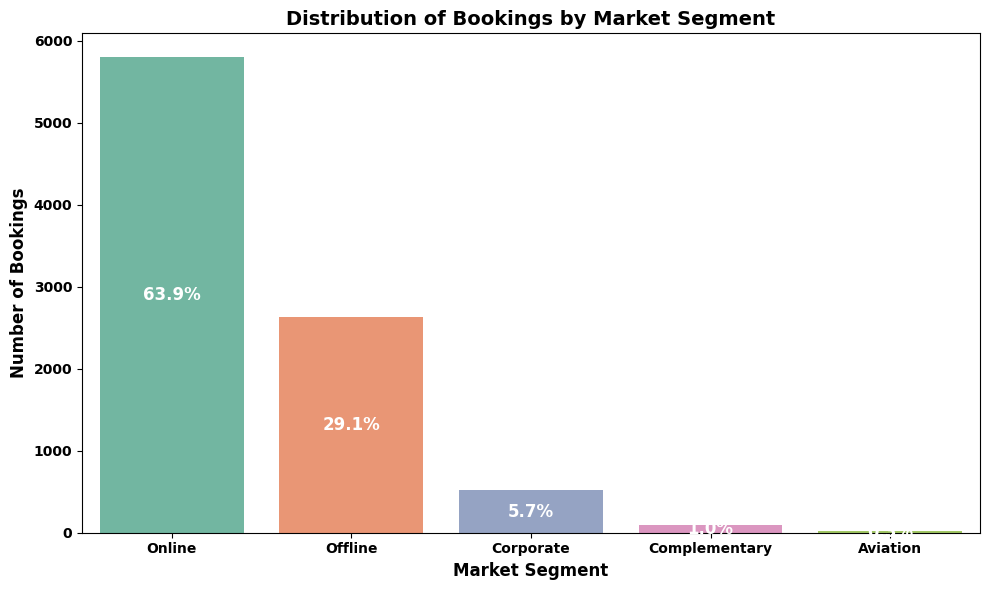


Market Segment Distribution:
         segment  percentage
0         Online        63.9
1        Offline        29.1
2      Corporate         5.7
3  Complementary         1.0
4       Aviation         0.3


In [188]:
# Count market segments and calculate percentages
segment_counts = df_HotelData_new['market_segment_type'].value_counts().reset_index()
segment_counts.columns = ['segment', 'count']
segment_counts['percentage'] = (segment_counts['count'] / segment_counts['count'].sum() * 100).round(1)

# Create barplot
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data=segment_counts, x='segment', y='count', 
            palette='Set2', ax=ax)

# Add percentage labels on bars
for i, row in segment_counts.iterrows():
    ax.text(i, row['count']/2, f"{row['percentage']}%", 
            ha='center', va='center', fontsize=12, fontweight='bold', color='white')

# Bold title and axis labels
ax.set_title('Distribution of Bookings by Market Segment', fontweight='bold', fontsize=14)
ax.set_xlabel('Market Segment', fontweight='bold', fontsize=12)
ax.set_ylabel('Number of Bookings', fontweight='bold', fontsize=12)

# Bold tick labels
for label in ax.get_xticklabels():
    label.set_fontweight('bold')
for label in ax.get_yticklabels():
    label.set_fontweight('bold')

plt.tight_layout()
plt.show()

# Print summary
print("\nMarket Segment Distribution:")
print(segment_counts[['segment', 'percentage']])

## ** Booking Lead Times Analysis ** ##

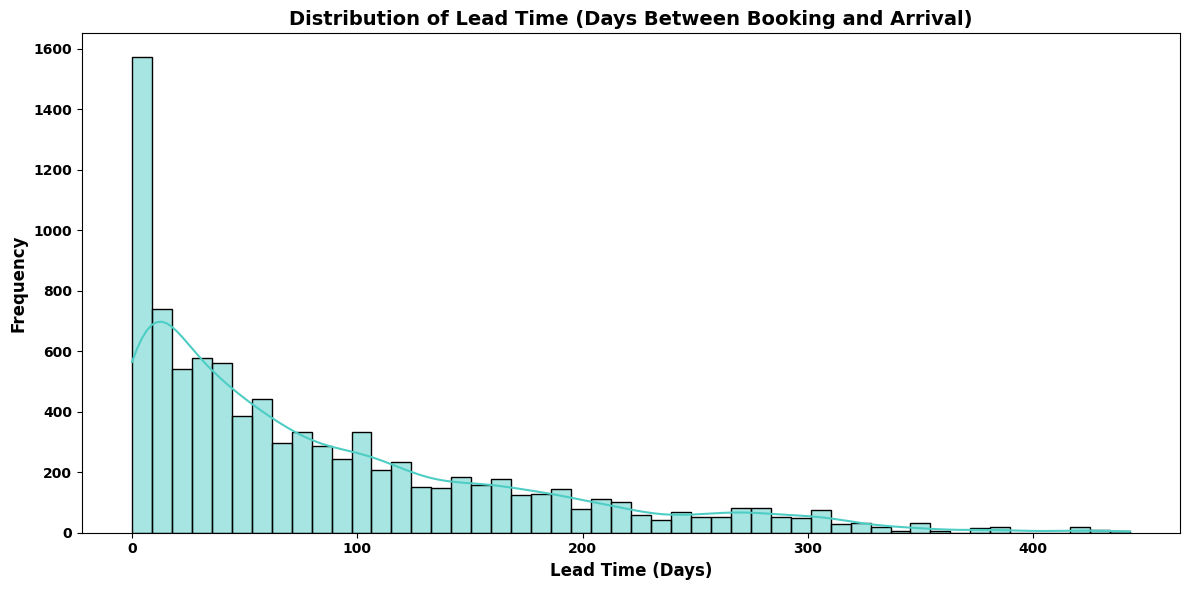


Lead Time Statistics:
Mean: 85.15 days
Median: 56.00 days
Std Dev: 86.37 days
Min: 0 days
Max: 443 days
Number of Zero Days: 334 
Requring Parking: 274 
Not Requiring Parking: 8795 



In [189]:
# Create histogram
fig, ax = plt.subplots(figsize=(12, 6))
sns.histplot(data=df_HotelData_new, x='lead_time', bins=50, kde=True, color='#4ECDC4', ax=ax)

# Bold title and axis labels
ax.set_title('Distribution of Lead Time (Days Between Booking and Arrival)', 
             fontweight='bold', fontsize=14)
ax.set_xlabel('Lead Time (Days)', fontweight='bold', fontsize=12)
ax.set_ylabel('Frequency', fontweight='bold', fontsize=12)

# Bold tick labels
for label in ax.get_xticklabels():
    label.set_fontweight('bold')
for label in ax.get_yticklabels():
    label.set_fontweight('bold')

plt.tight_layout()
plt.show()

# Print summary statistics
print("\nLead Time Statistics:")
print(f"Mean: {df_HotelData_new['lead_time'].mean():.2f} days")
print(f"Median: {df_HotelData_new['lead_time'].median():.2f} days")
print(f"Std Dev: {df_HotelData_new['lead_time'].std():.2f} days")
print(f"Min: {df_HotelData_new['lead_time'].min()} days")
print(f"Max: {df_HotelData_new['lead_time'].max()} days")
print(f"Number of Zero Days: {(df_HotelData_new['lead_time'] == 0).sum()} ")
print(f"Requring Parking: {(df_HotelData_new['required_car_parking_space'] == 1).sum()} ")
print(f"Not Requiring Parking: {(df_HotelData_new['required_car_parking_space'] == 0).sum()} ")
print()

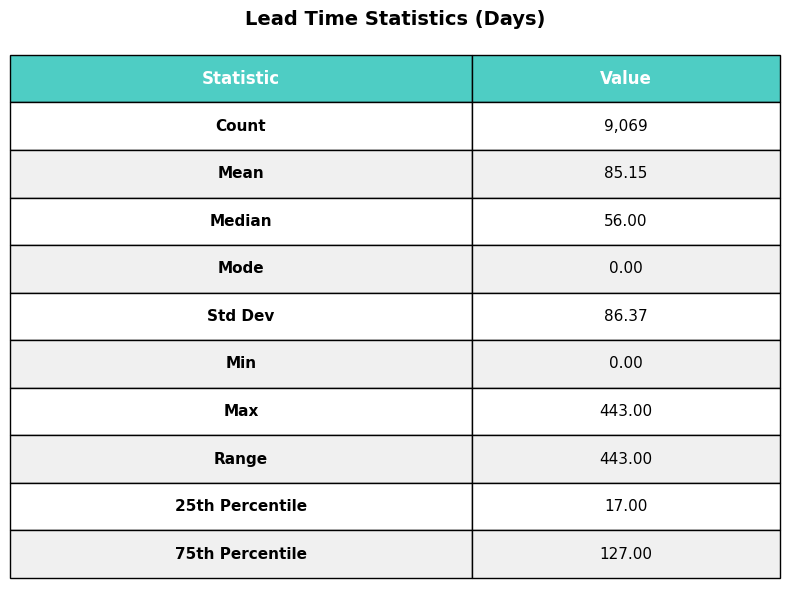

In [190]:
# Calculate statistics for lead_time
stats_data = {
    'Statistic': ['Count', 'Mean', 'Median', 'Mode', 'Std Dev', 'Min', 'Max', 'Range', '25th Percentile', '75th Percentile'],
    'Value': [
        df_HotelData_new['lead_time'].count(),
        df_HotelData_new['lead_time'].mean(),
        df_HotelData_new['lead_time'].median(),
        df_HotelData_new['lead_time'].mode()[0] if len(df_HotelData_new['lead_time'].mode()) > 0 else 0,
        df_HotelData_new['lead_time'].std(),
        df_HotelData_new['lead_time'].min(),
        df_HotelData_new['lead_time'].max(),
        df_HotelData_new['lead_time'].max() - df_HotelData_new['lead_time'].min(),
        df_HotelData_new['lead_time'].quantile(0.25),
        df_HotelData_new['lead_time'].quantile(0.75)
    ]
}

# Format the values
formatted_values = []
for stat, val in zip(stats_data['Statistic'], stats_data['Value']):
    if stat == 'Count':
        formatted_values.append(f"{int(val):,}")
    else:
        formatted_values.append(f"{val:.2f}")

# Create figure
fig, ax = plt.subplots(figsize=(8, 6))
ax.axis('tight')
ax.axis('off')

# Prepare table data
table_data = [['Statistic', 'Value']]
for stat, val in zip(stats_data['Statistic'], formatted_values):
    table_data.append([stat, val])

# Create table
table = ax.table(cellText=table_data, cellLoc='center', loc='center',
                colWidths=[0.6, 0.4])

# Style the table
table.auto_set_font_size(False)
table.set_fontsize(11)
table.scale(1, 2.5)

# Color header row
for i in range(2):
    table[(0, i)].set_facecolor('#4ECDC4')
    table[(0, i)].set_text_props(weight='bold', color='white', size=12)

# Alternate row colors
for i in range(1, len(table_data)):
    color = '#F0F0F0' if i % 2 == 0 else 'white'
    for j in range(2):
        table[(i, j)].set_facecolor(color)
        if j == 0:  # Bold statistic names
            table[(i, j)].set_text_props(weight='bold')

plt.title('Lead Time Statistics (Days)', fontweight='bold', fontsize=14, pad=20)
plt.tight_layout()
plt.show()

C:\Users\jxbma\AppData\Local\Temp\ipykernel_15072\904491803.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bin_counts, x='lead_time_bin', y='count',


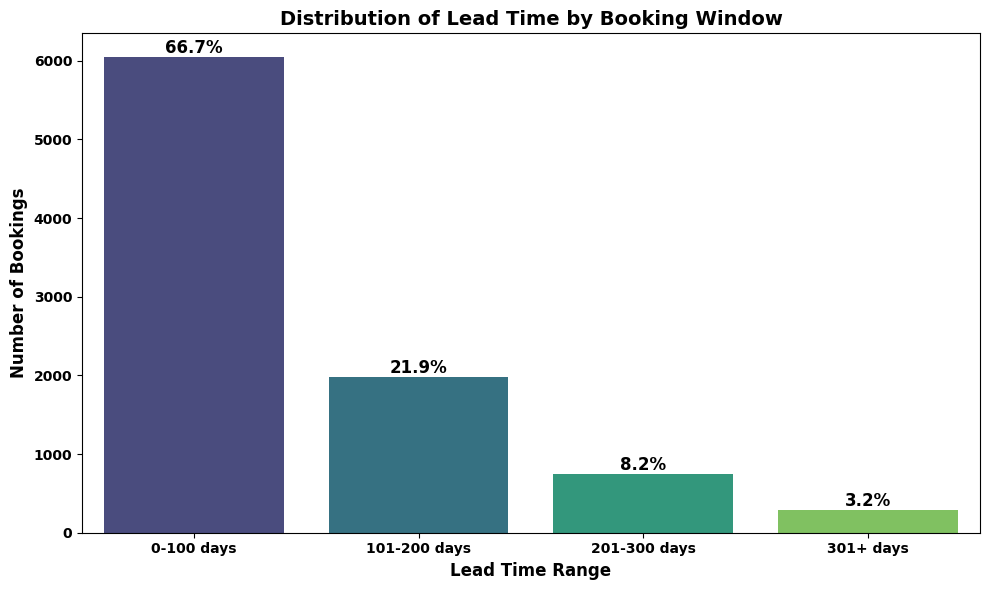


Lead Time Distribution by Bins:
0-100 days: 6047 bookings (66.7%)
101-200 days: 1984 bookings (21.9%)
201-300 days: 748 bookings (8.2%)
301+ days: 290 bookings (3.2%)


In [191]:
# Create bins for lead_time
bins = [0, 100, 200, 300, df_HotelData_new['lead_time'].max() + 1]
labels = ['0-100 days', '101-200 days', '201-300 days', '301+ days']

# Create a temporary series with binned data (without modifying original df)
lead_time_binned = pd.cut(df_HotelData_new['lead_time'], bins=bins, labels=labels, right=False)

# Count and calculate percentages
bin_counts = lead_time_binned.value_counts().sort_index().reset_index()
bin_counts.columns = ['lead_time_bin', 'count']
bin_counts['percentage'] = (bin_counts['count'] / bin_counts['count'].sum() * 100).round(1)

# Create countplot
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data=bin_counts, x='lead_time_bin', y='count', 
            palette='viridis', ax=ax)

# Add percentage labels on bars
for i, row in bin_counts.iterrows():
    ax.text(i, row['count'], f"{row['percentage']}%", 
            ha='center', va='bottom', fontsize=12, fontweight='bold')

# Bold title and axis labels
ax.set_title('Distribution of Lead Time by Booking Window', fontweight='bold', fontsize=14)
ax.set_xlabel('Lead Time Range', fontweight='bold', fontsize=12)
ax.set_ylabel('Number of Bookings', fontweight='bold', fontsize=12)

# Bold tick labels
for label in ax.get_xticklabels():
    label.set_fontweight('bold')
for label in ax.get_yticklabels():
    label.set_fontweight('bold')


plt.tight_layout()
plt.show()

# Print summary
print("\nLead Time Distribution by Bins:")
for _, row in bin_counts.iterrows():
    print(f"{row['lead_time_bin']}: {row['count']} bookings ({row['percentage']}%)")

## <ul>**Analyze Cancellations**</ul> ##

C:\Users\jxbma\AppData\Local\Temp\ipykernel_15072\3019270482.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=status_counts, x='status', y='count',


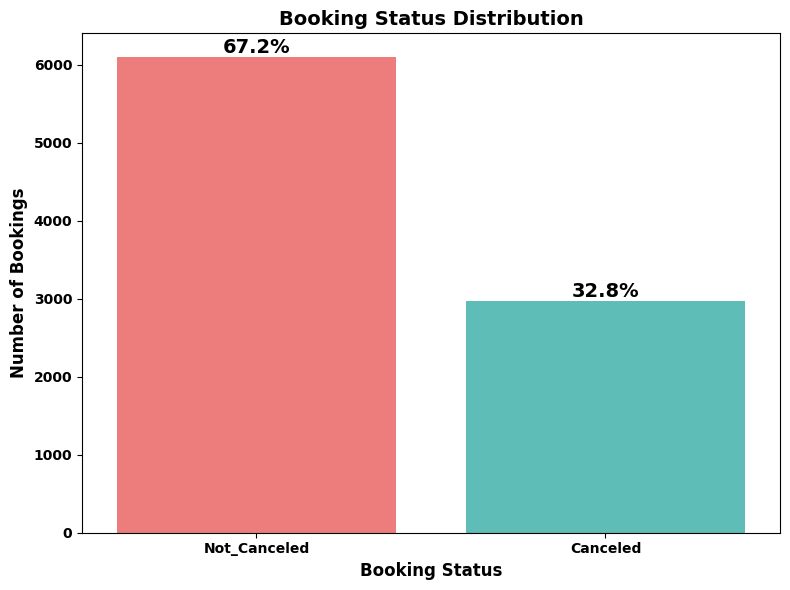


Booking Status Distribution:
Not_Canceled: 6098 (67.2%)
Canceled: 2971 (32.8%)


In [192]:
# Count booking status and calculate percentages
status_counts = df_HotelData_new['booking_status'].value_counts().reset_index()
status_counts.columns = ['status', 'count']
status_counts['percentage'] = (status_counts['count'] / status_counts['count'].sum() * 100).round(1)

# Create barplot
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(data=status_counts, x='status', y='count', 
            palette=['#FF6B6B', '#4ECDC4'], ax=ax)

# Add percentage labels on top of bars
for i, row in status_counts.iterrows():
    ax.text(i, row['count'], f"{row['percentage']}%", 
            ha='center', va='bottom', fontsize=14, fontweight='bold')

# Bold title and axis labels
ax.set_title('Booking Status Distribution', fontweight='bold', fontsize=14)
ax.set_xlabel('Booking Status', fontweight='bold', fontsize=12)
ax.set_ylabel('Number of Bookings', fontweight='bold', fontsize=12)

# Bold tick labels
for label in ax.get_xticklabels():
    label.set_fontweight('bold')
for label in ax.get_yticklabels():
    label.set_fontweight('bold')

plt.tight_layout()
plt.show()

# Print summary
print("\nBooking Status Distribution:")
for _, row in status_counts.iterrows():
    print(f"{row['status']}: {row['count']} ({row['percentage']}%)")

## <ul>**Analyze Repeat Business**</ul> ##

C:\Users\jxbma\AppData\Local\Temp\ipykernel_15072\3684007255.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=repeat_counts, x='customer_type', y='count',


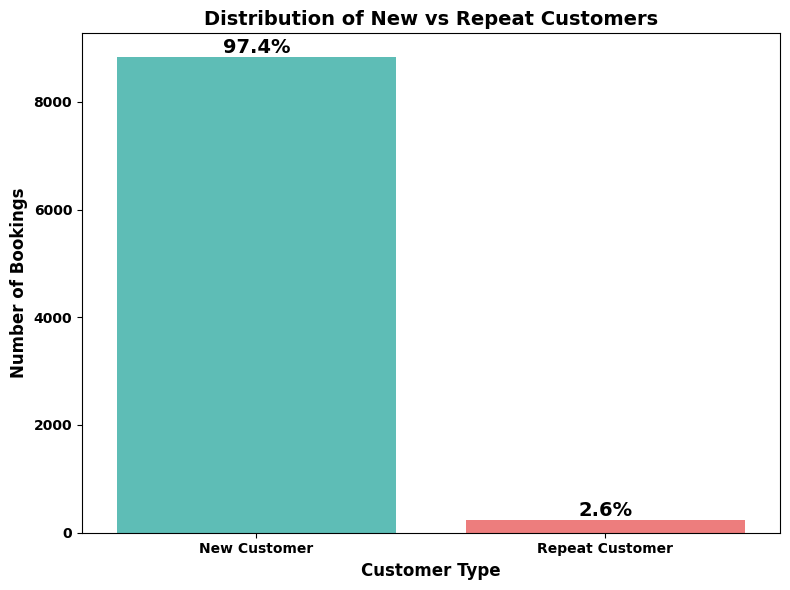


Customer Type Distribution:
New Customer: 8829 (97.4%)
Repeat Customer: 240 (2.6%)


In [193]:
# Count repeat customers and calculate percentages
repeat_counts = df_HotelData_new['repeated_guest'].value_counts().reset_index()
repeat_counts.columns = ['customer_type', 'count']

# Map 0/1 to labels
repeat_counts['customer_type'] = repeat_counts['customer_type'].map({0: 'New Customer', 1: 'Repeat Customer'})

# Calculate percentages
repeat_counts['percentage'] = (repeat_counts['count'] / repeat_counts['count'].sum() * 100).round(1)

# Create barplot
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(data=repeat_counts, x='customer_type', y='count', 
            palette=['#4ECDC4', '#FF6B6B'], ax=ax)

# Add percentage labels on top of bars
for i, row in repeat_counts.iterrows():
    ax.text(i, row['count'], f"{row['percentage']}%", 
            ha='center', va='bottom', fontsize=14, fontweight='bold')

# Bold title and axis labels
ax.set_title('Distribution of New vs Repeat Customers', fontweight='bold', fontsize=14)
ax.set_xlabel('Customer Type', fontweight='bold', fontsize=12)
ax.set_ylabel('Number of Bookings', fontweight='bold', fontsize=12)

# Bold tick labels
for label in ax.get_xticklabels():
    label.set_fontweight('bold')
for label in ax.get_yticklabels():
    label.set_fontweight('bold')

plt.tight_layout()
plt.show()

# Print summary
print("\nCustomer Type Distribution:")
for _, row in repeat_counts.iterrows():
    print(f"{row['customer_type']}: {row['count']} ({row['percentage']}%)")

### <u>**Bivariate Analysis - Special Requests vs Cancellations**</u>


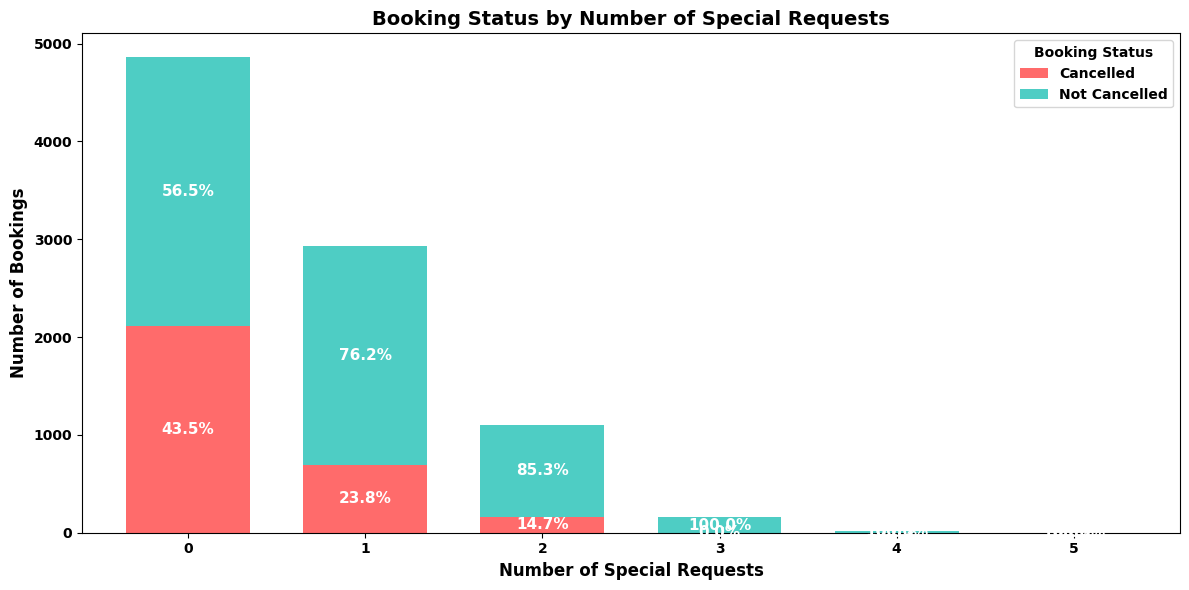


Cancellation Rate by Number of Special Requests:
0 requests: 43.5% cancelled, 56.5% not cancelled (n=4861)
1 requests: 23.8% cancelled, 76.2% not cancelled (n=2927)
2 requests: 14.7% cancelled, 85.3% not cancelled (n=1104)
3 requests: 0.0% cancelled, 100.0% not cancelled (n=156)
4 requests: 0.0% cancelled, 100.0% not cancelled (n=19)
5 requests: 0.0% cancelled, 100.0% not cancelled (n=2)


In [194]:
# Create crosstab to get counts
crosstab = pd.crosstab(df_HotelData_new['no_of_special_requests'], 
                        df_HotelData_new['booking_status'])

# Calculate percentages for each special request level
crosstab_pct = crosstab.div(crosstab.sum(axis=1), axis=0) * 100

# Create stacked bar chart
fig, ax = plt.subplots(figsize=(12, 6))

crosstab.plot(kind='bar', stacked=True, ax=ax, color=['#FF6B6B', '#4ECDC4'], width=0.7)

# Add percentage labels on stacked bars
for i, num_requests in enumerate(crosstab.index):
    cancelled_count = crosstab.loc[num_requests, 'Canceled']
    not_cancelled_count = crosstab.loc[num_requests, 'Not_Canceled']
    
    cancelled_pct = crosstab_pct.loc[num_requests, 'Canceled']
    not_cancelled_pct = crosstab_pct.loc[num_requests, 'Not_Canceled']
    
    # Cancelled portion (bottom)
    ax.text(i, cancelled_count/2, f"{cancelled_pct:.1f}%", 
            ha='center', va='center', fontsize=11, fontweight='bold', color='white')
    
    # Not Cancelled portion (top)
    ax.text(i, cancelled_count + not_cancelled_count/2, f"{not_cancelled_pct:.1f}%", 
            ha='center', va='center', fontsize=11, fontweight='bold', color='white')

# Bold title and axis labels
ax.set_title('Booking Status by Number of Special Requests', fontweight='bold', fontsize=14)
ax.set_xlabel('Number of Special Requests', fontweight='bold', fontsize=12)
ax.set_ylabel('Number of Bookings', fontweight='bold', fontsize=12)
ax.legend(title='Booking Status', title_fontproperties={'weight': 'bold'}, 
          prop={'weight': 'bold'}, labels=['Cancelled', 'Not Cancelled'])

# Bold tick labels
for label in ax.get_xticklabels():
    label.set_fontweight('bold')
for label in ax.get_yticklabels():
    label.set_fontweight('bold')

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Print summary statistics
print("\nCancellation Rate by Number of Special Requests:")
print("=" * 60)
for num_requests in crosstab.index:
    cancelled_pct = crosstab_pct.loc[num_requests, 'Canceled']
    not_cancelled_pct = crosstab_pct.loc[num_requests, 'Not_Canceled']
    total = crosstab.loc[num_requests].sum()
    print(f"{num_requests} requests: {cancelled_pct:.1f}% cancelled, {not_cancelled_pct:.1f}% not cancelled (n={total})")

In [195]:
### <u>**Bivariate Analysis - Market Segments vs Cancellations**</u>

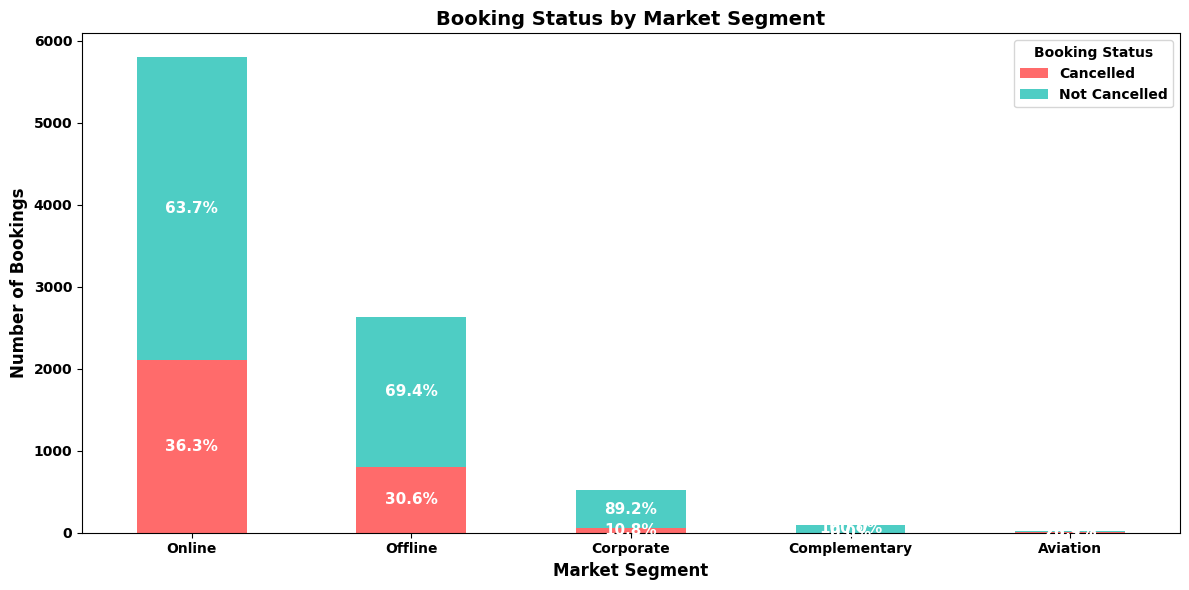


Cancellation Rate by Market Segment:
Online: 36.3% cancelled, 63.7% not cancelled (n=5798)
Offline: 30.6% cancelled, 69.4% not cancelled (n=2635)
Corporate: 10.8% cancelled, 89.2% not cancelled (n=517)
Complementary: 0.0% cancelled, 100.0% not cancelled (n=93)
Aviation: 26.9% cancelled, 73.1% not cancelled (n=26)
Total Bookings: 9069

Online Cancelled Bookings: 2103
Online Cancelled as % of Total Bookings: 23.19%

Offline Cancelled Bookings: 805
Offline Cancelled as % of Total Bookings: 8.88%

Combined Online + Offline Cancelled: 2908
Combined as % of Total Bookings: 2908
Total Cancellations: 2971

Online Cancelled: 2103
Online as % of Total Cancellations: 70.78%

Offline Cancelled: 805
Offline as % of Total Cancellations: 27.10%

Combined Online + Offline: 2908
Combined as % of Total Cancellations: 97.88%


In [196]:
# Create crosstab to get counts
crosstab = pd.crosstab(df_HotelData_new['market_segment_type'], 
                        df_HotelData_new['booking_status'])

# Calculate percentages for each market segment
crosstab_pct = crosstab.div(crosstab.sum(axis=1), axis=0) * 100

# Define custom order
segment_order = ['Online', 'Offline', 'Corporate', 'Complementary', 'Aviation']

# Reindex to match the desired order
crosstab = crosstab.reindex(segment_order)
crosstab_pct = crosstab_pct.reindex(segment_order)

# Create stacked bar chart
fig, ax = plt.subplots(figsize=(12, 6))

crosstab.plot(kind='bar', stacked=True, ax=ax, color=['#FF6B6B', '#4ECDC4'])

# Add percentage labels on stacked bars
for i, segment in enumerate(crosstab.index):
    cancelled_count = crosstab.loc[segment, 'Canceled']
    not_cancelled_count = crosstab.loc[segment, 'Not_Canceled']
    
    cancelled_pct = crosstab_pct.loc[segment, 'Canceled']
    not_cancelled_pct = crosstab_pct.loc[segment, 'Not_Canceled']
    
    # Cancelled portion (bottom)
    ax.text(i, cancelled_count/2, f"{cancelled_pct:.1f}%", 
            ha='center', va='center', fontsize=11, fontweight='bold', color='white')
    
    # Not Cancelled portion (top)
    ax.text(i, cancelled_count + not_cancelled_count/2, f"{not_cancelled_pct:.1f}%", 
            ha='center', va='center', fontsize=11, fontweight='bold', color='white')

# Bold title and axis labels
ax.set_title('Booking Status by Market Segment', fontweight='bold', fontsize=14)
ax.set_xlabel('Market Segment', fontweight='bold', fontsize=12)
ax.set_ylabel('Number of Bookings', fontweight='bold', fontsize=12)
ax.legend(title='Booking Status', title_fontproperties={'weight': 'bold'}, 
          prop={'weight': 'bold'}, labels=['Cancelled', 'Not Cancelled'])

# Bold tick labels
for label in ax.get_xticklabels():
    label.set_fontweight('bold')
for label in ax.get_yticklabels():
    label.set_fontweight('bold')

labels = ax.get_xticklabels()
for label in labels:
    label.set_fontweight('bold')
    label.set_rotation(0)
    label.set_horizontalalignment('center')
    label.set_verticalalignment('top')

plt.tight_layout()
plt.show()

# Print summary statistics
print("\nCancellation Rate by Market Segment:")
print("=" * 60)
for segment in segment_order:
    cancelled_pct = crosstab_pct.loc[segment, 'Canceled']
    not_cancelled_pct = crosstab_pct.loc[segment, 'Not_Canceled']
    total = crosstab.loc[segment].sum()
    print(f"{segment}: {cancelled_pct:.1f}% cancelled, {not_cancelled_pct:.1f}% not cancelled (n={total})")

# Get total number of bookings
total_bookings = len(df_HotelData_new)

# Count cancelled bookings for Online segment
online_cancelled = len(df_HotelData_new[
    (df_HotelData_new['market_segment_type'] == 'Online') & 
    (df_HotelData_new['booking_status'] == 'Canceled')
])

# Count cancelled bookings for Offline segment
offline_cancelled = len(df_HotelData_new[
    (df_HotelData_new['market_segment_type'] == 'Offline') & 
    (df_HotelData_new['booking_status'] == 'Canceled')
])

# Calculate percentages
online_cancelled_pct = (online_cancelled / total_bookings) * 100
offline_cancelled_pct = (offline_cancelled / total_bookings) * 100

print(f"Total Bookings: {total_bookings}")
print(f"\nOnline Cancelled Bookings: {online_cancelled}")
print(f"Online Cancelled as % of Total Bookings: {online_cancelled_pct:.2f}%")
print(f"\nOffline Cancelled Bookings: {offline_cancelled}")
print(f"Offline Cancelled as % of Total Bookings: {offline_cancelled_pct:.2f}%")
print(f"\nCombined Online + Offline Cancelled: {online_cancelled + offline_cancelled}")
print(f"Combined as % of Total Bookings: {(online_cancelled + offline_cancelled)}")   

# Get total number of cancellations
total_cancellations = len(df_HotelData_new[df_HotelData_new['booking_status'] == 'Canceled'])

# Count cancelled bookings for Online segment
online_cancelled = len(df_HotelData_new[
    (df_HotelData_new['market_segment_type'] == 'Online') & 
    (df_HotelData_new['booking_status'] == 'Canceled')
])

# Count cancelled bookings for Offline segment
offline_cancelled = len(df_HotelData_new[
    (df_HotelData_new['market_segment_type'] == 'Offline') & 
    (df_HotelData_new['booking_status'] == 'Canceled')
])

# Calculate percentages of total cancellations
online_pct_of_cancellations = (online_cancelled / total_cancellations) * 100
offline_pct_of_cancellations = (offline_cancelled / total_cancellations) * 100

print(f"Total Cancellations: {total_cancellations}")
print(f"\nOnline Cancelled: {online_cancelled}")
print(f"Online as % of Total Cancellations: {online_pct_of_cancellations:.2f}%")
print(f"\nOffline Cancelled: {offline_cancelled}")
print(f"Offline as % of Total Cancellations: {offline_pct_of_cancellations:.2f}%")
print(f"\nCombined Online + Offline: {online_cancelled + offline_cancelled}")
print(f"Combined as % of Total Cancellations: {(online_cancelled + offline_cancelled) / total_cancellations * 100:.2f}%")

### <u>**Bivariate Analysis - Market Segments vs Room Price**</u>

C:\Users\jxbma\AppData\Local\Temp\ipykernel_15072\888954520.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_HotelData_new, x='market_segment_type', y='avg_price_per_room',


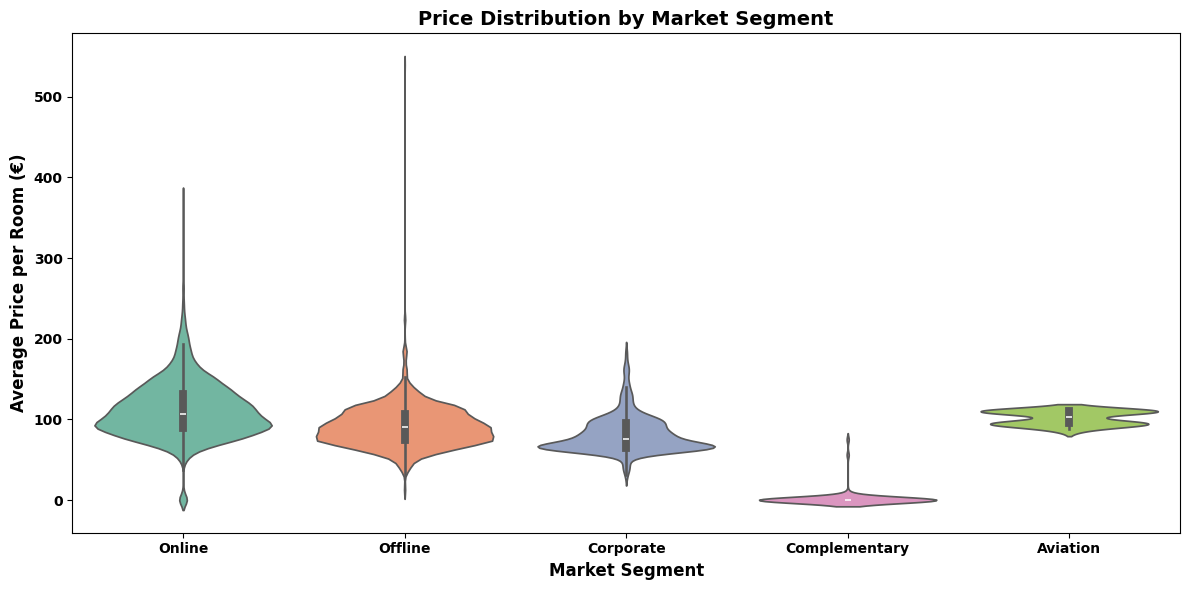

In [197]:
# Create violin plot
fig, ax = plt.subplots(figsize=(12, 6))

# Define segment order
segment_order = ['Online', 'Offline', 'Corporate', 'Complementary', 'Aviation']

sns.violinplot(data=df_HotelData_new, x='market_segment_type', y='avg_price_per_room', 
               palette='Set2', ax=ax, order=segment_order)

# Bold title and axis labels
ax.set_title('Price Distribution by Market Segment', fontweight='bold', fontsize=14)
ax.set_xlabel('Market Segment', fontweight='bold', fontsize=12)
ax.set_ylabel('Average Price per Room (€)', fontweight='bold', fontsize=12)

# Bold tick labels
for label in ax.get_xticklabels():
    label.set_fontweight('bold')
for label in ax.get_yticklabels():
    label.set_fontweight('bold')

plt.tight_layout()
plt.show()

C:\Users\jxbma\AppData\Local\Temp\ipykernel_15072\342029593.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=df_HotelData_new, x='market_segment_type', y='avg_price_per_room',


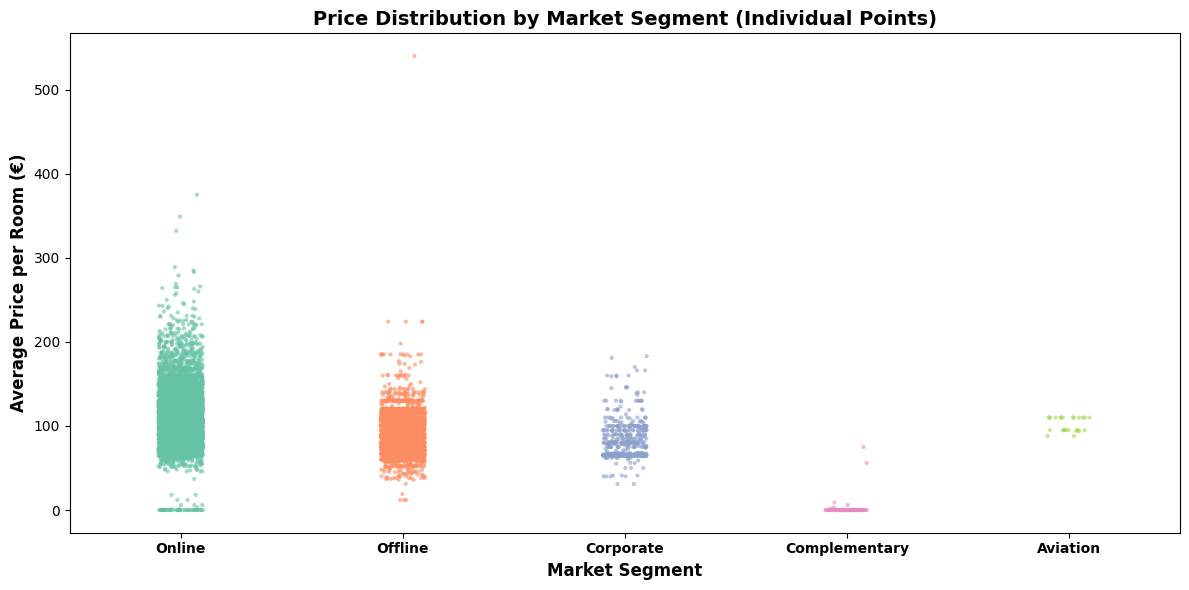

In [198]:
# Create swarm plot
fig, ax = plt.subplots(figsize=(12, 6))

# Define segment order
segment_order = ['Online', 'Offline', 'Corporate', 'Complementary', 'Aviation']

sns.stripplot(data=df_HotelData_new, x='market_segment_type', y='avg_price_per_room', 
              palette='Set2', ax=ax, order=segment_order, size=3, alpha=0.6)

# Bold title and axis labels
ax.set_title('Price Distribution by Market Segment (Individual Points)', fontweight='bold', fontsize=14)
ax.set_xlabel('Market Segment', fontweight='bold', fontsize=12)
ax.set_ylabel('Average Price per Room (€)', fontweight='bold', fontsize=12)

# Bold tick labels
for label in ax.get_xticklabels():
    label.set_fontweight('bold')
for label in ax.get_yticklabels():
    label.set_fontweight=('bold')

plt.tight_layout()
plt.show()

### <u>**Bivariate Analysis - Arrival month vs cancellation**</u>

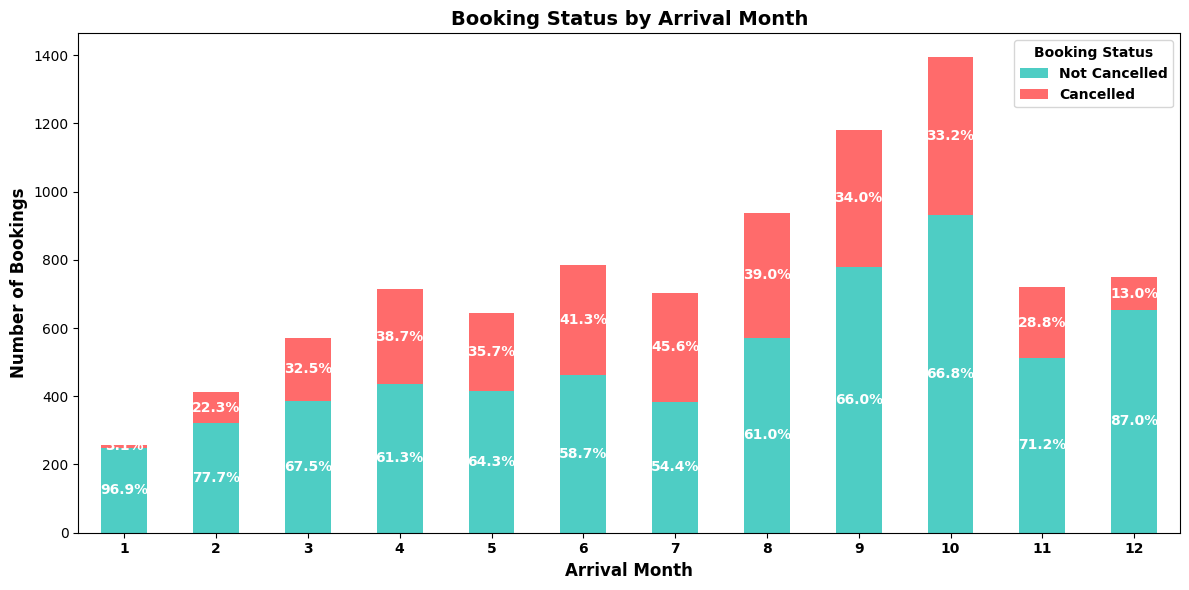


Cancellation Rate by Arrival Month:
Month 1: 3.1% cancelled, 96.9% not cancelled (n=257)
Month 2: 22.3% cancelled, 77.7% not cancelled (n=413)
Month 3: 32.5% cancelled, 67.5% not cancelled (n=572)
Month 4: 38.7% cancelled, 61.3% not cancelled (n=713)
Month 5: 35.7% cancelled, 64.3% not cancelled (n=644)
Month 6: 41.3% cancelled, 58.7% not cancelled (n=786)
Month 7: 45.6% cancelled, 54.4% not cancelled (n=704)
Month 8: 39.0% cancelled, 61.0% not cancelled (n=937)
Month 9: 34.0% cancelled, 66.0% not cancelled (n=1181)
Month 10: 33.2% cancelled, 66.8% not cancelled (n=1394)
Month 11: 28.8% cancelled, 71.2% not cancelled (n=719)
Month 12: 13.0% cancelled, 87.0% not cancelled (n=749)
Off-Peak Season (November - April) Cancellation Analysis:
Total Bookings: 3423
Cancelled Bookings: 866
Cancellation Rate: 25.30%


In [199]:
# Create crosstab to get counts
crosstab = pd.crosstab(df_HotelData_new['arrival_month'], 
                        df_HotelData_new['booking_status'])

# Reorder columns so Not_Canceled is first (bottom of stack)
crosstab = crosstab[['Not_Canceled', 'Canceled']]

# Calculate percentages for each month
crosstab_pct = crosstab.div(crosstab.sum(axis=1), axis=0) * 100

# Create stacked bar chart
fig, ax = plt.subplots(figsize=(12, 6))

crosstab.plot(kind='bar', stacked=True, ax=ax, color=['#4ECDC4', '#FF6B6B'])

# Add percentage labels on stacked bars
for i, month in enumerate(crosstab.index):
    not_cancelled_count = crosstab.loc[month, 'Not_Canceled']
    cancelled_count = crosstab.loc[month, 'Canceled']
    
    not_cancelled_pct = crosstab_pct.loc[month, 'Not_Canceled']
    cancelled_pct = crosstab_pct.loc[month, 'Canceled']
    
    # Not Cancelled portion (bottom)
    ax.text(i, not_cancelled_count/2, f"{not_cancelled_pct:.1f}%", 
            ha='center', va='center', fontsize=10, fontweight='bold', color='white')
    
    # Cancelled portion (top)
    ax.text(i, not_cancelled_count + cancelled_count/2, f"{cancelled_pct:.1f}%", 
            ha='center', va='center', fontsize=10, fontweight='bold', color='white')

# Bold title and axis labels
ax.set_title('Booking Status by Arrival Month', fontweight='bold', fontsize=14)
ax.set_xlabel('Arrival Month', fontweight='bold', fontsize=12)
ax.set_ylabel('Number of Bookings', fontweight='bold', fontsize=12)
ax.legend(title='Booking Status', title_fontproperties={'weight': 'bold'}, 
          prop={'weight': 'bold'}, labels=['Not Cancelled', 'Cancelled'])

# Bold tick labels
for label in ax.get_xticklabels():
    label.set_fontweight('bold')
for label in ax.get_yticklabels():
    label.set_fontweight=('bold')

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Print summary statistics
print("\nCancellation Rate by Arrival Month:")
print("=" * 60)
for month in crosstab.index:
    cancelled_pct = crosstab_pct.loc[month, 'Canceled']
    not_cancelled_pct = crosstab_pct.loc[month, 'Not_Canceled']
    total = crosstab.loc[month].sum()
    print(f"Month {month}: {cancelled_pct:.1f}% cancelled, {not_cancelled_pct:.1f}% not cancelled (n={total})")

    # Filter for November through April (months 11, 12, 1, 2, 3, 4)
off_peak_months = [11, 12, 1, 2, 3, 4]
off_peak_data = df_HotelData_new[df_HotelData_new['arrival_month'].isin(off_peak_months)]

# Count total bookings
total_bookings = len(off_peak_data)

# Count cancelled bookings
cancelled_bookings = len(off_peak_data[off_peak_data['booking_status'] == 'Canceled'])

# Calculate percentage
cancellation_percentage = (cancelled_bookings / total_bookings * 100)

print(f"Off-Peak Season (November - April) Cancellation Analysis:")
print(f"Total Bookings: {total_bookings}")
print(f"Cancelled Bookings: {cancelled_bookings}")
print(f"Cancellation Rate: {cancellation_percentage:.2f}%")

In [200]:
### <u>**Bivariate Analysis - Booking Lead Time vs cancellation**</u>

C:\Users\jxbma\AppData\Local\Temp\ipykernel_15072\3667154560.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  lead_time_status = df_HotelData_new.groupby(['lead_time_bin', 'booking_status']).size().unstack(fill_value=0)


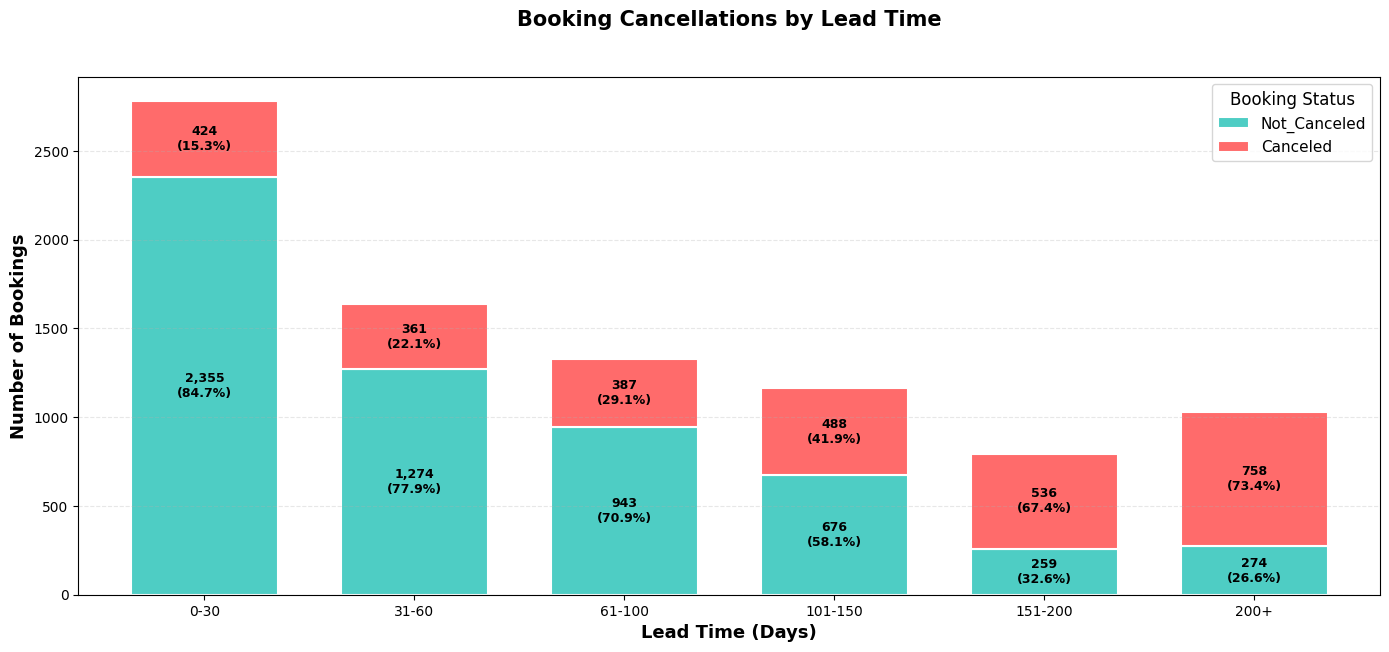


Summary Statistics by Lead Time:

Lead Time       Total        Not Canceled           Canceled               Cancel Rate    
------------------------------------------------------------------------------------------
0-30            2,779           2,355 ( 84.7%)          424 ( 15.3%)      15.26%
31-60           1,635           1,274 ( 77.9%)          361 ( 22.1%)      22.08%
61-100          1,330             943 ( 70.9%)          387 ( 29.1%)      29.10%
101-150         1,164             676 ( 58.1%)          488 ( 41.9%)      41.92%
151-200         795               259 ( 32.6%)          536 ( 67.4%)      67.42%
200+            1,032             274 ( 26.6%)          758 ( 73.4%)      73.45%
------------------------------------------------------------------------------------------
TOTAL           8,735           5,781 ( 66.2%)        2,954 ( 33.8%)      33.82%



In [201]:
import pandas as pd
import matplotlib.pyplot as plt

# Create lead time bins
df_HotelData_new['lead_time_bin'] = pd.cut(df_HotelData_new['lead_time'], 
                               bins=[0, 30, 60, 100, 150, 200, 500],
                               labels=['0-30', '31-60', '61-100', '101-150', '151-200', '200+'])

# Calculate counts
lead_time_status = df_HotelData_new.groupby(['lead_time_bin', 'booking_status']).size().unstack(fill_value=0)

# Reorder columns so Not_Canceled is first (bottom of stack)
if 'Not_Canceled' in lead_time_status.columns and 'Canceled' in lead_time_status.columns:
    lead_time_status = lead_time_status[['Not_Canceled', 'Canceled']]

# Calculate percentages for labels
lead_time_pct = lead_time_status.div(lead_time_status.sum(axis=1), axis=0) * 100

# Create the stacked bar chart
fig, ax = plt.subplots(figsize=(14, 8))

# Plot with Not_Canceled on bottom (blue), Canceled on top (red)
# Using COUNTS not percentages
lead_time_status.plot(kind='bar', stacked=True, ax=ax, 
                      color=['#4ECDC4', '#FF6B6B'],  # Teal for Not Canceled, Red for Canceled
                      width=0.7,
                      edgecolor='white',
                      linewidth=1.5)

# Formatting
ax.set_xlabel('Lead Time (Days)', fontsize=13, fontweight='bold')
ax.set_ylabel('Number of Bookings', fontsize=13, fontweight='bold')
ax.set_title('Booking Cancellations by Lead Time\n', fontsize=15, fontweight='bold', pad=20)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center')
ax.legend(title='Booking Status', loc='upper right', fontsize=11, title_fontsize=12)
ax.grid(axis='y', alpha=0.3, linestyle='--')

# Add count labels on bars with percentages
for i, container in enumerate(ax.containers):
    # Get the corresponding percentages for labels
    if i == 0:  # Not_Canceled (bottom)
        labels = [f'{int(v):,}\n({lead_time_pct.iloc[j, i]:.1f}%)' if v > 0 else '' 
                  for j, v in enumerate(container.datavalues)]
    else:  # Canceled (top)
        labels = [f'{int(v):,}\n({lead_time_pct.iloc[j, i]:.1f}%)' if v > 0 else '' 
                  for j, v in enumerate(container.datavalues)]
    
    ax.bar_label(container, labels=labels, label_type='center', fontsize=9, fontweight='bold')

# Print summary statistics
summary_text = "\nSummary Statistics by Lead Time:\n" + "="*90 + "\n\n"
summary_text += f"{'Lead Time':<15} {'Total':<12} {'Not Canceled':<22} {'Canceled':<22} {'Cancel Rate':<15}\n"
summary_text += "-"*90 + "\n"

for idx in lead_time_status.index:
    total = lead_time_status.loc[idx].sum()
    not_canceled = lead_time_status.loc[idx, 'Not_Canceled']
    canceled = lead_time_status.loc[idx, 'Canceled']
    cancel_rate = (canceled / total * 100) if total > 0 else 0
    not_cancel_rate = (not_canceled / total * 100) if total > 0 else 0
    
    summary_text += f"{idx:<15} {int(total):<12,} {int(not_canceled):>8,} ({not_cancel_rate:>5.1f}%)     {int(canceled):>8,} ({cancel_rate:>5.1f}%)     {cancel_rate:>6.2f}%\n"

# Overall statistics
total_bookings = lead_time_status.sum().sum()
total_not_canceled = lead_time_status['Not_Canceled'].sum()
total_canceled = lead_time_status['Canceled'].sum()
overall_cancel_rate = (total_canceled / total_bookings * 100) if total_bookings > 0 else 0
overall_not_cancel_rate = (total_not_canceled / total_bookings * 100) if total_bookings > 0 else 0

summary_text += "-"*90 + "\n"
summary_text += f"{'TOTAL':<15} {int(total_bookings):<12,} {int(total_not_canceled):>8,} ({overall_not_cancel_rate:>5.1f}%)     {int(total_canceled):>8,} ({overall_cancel_rate:>5.1f}%)     {overall_cancel_rate:>6.2f}%\n"
summary_text += "="*90 + "\n"

# # Add text below plot
# plt.figtext(0.1, -0.15, summary_text, fontsize=10, family='monospace', 
#             verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.3))

plt.tight_layout()
plt.subplots_adjust(bottom=0.25)  # Make room for summary text
plt.show()

# Also print to console
print(summary_text)

### <u>**Trivariate Analysis - Market Segments vs Room Price vs Booking Status**</u>

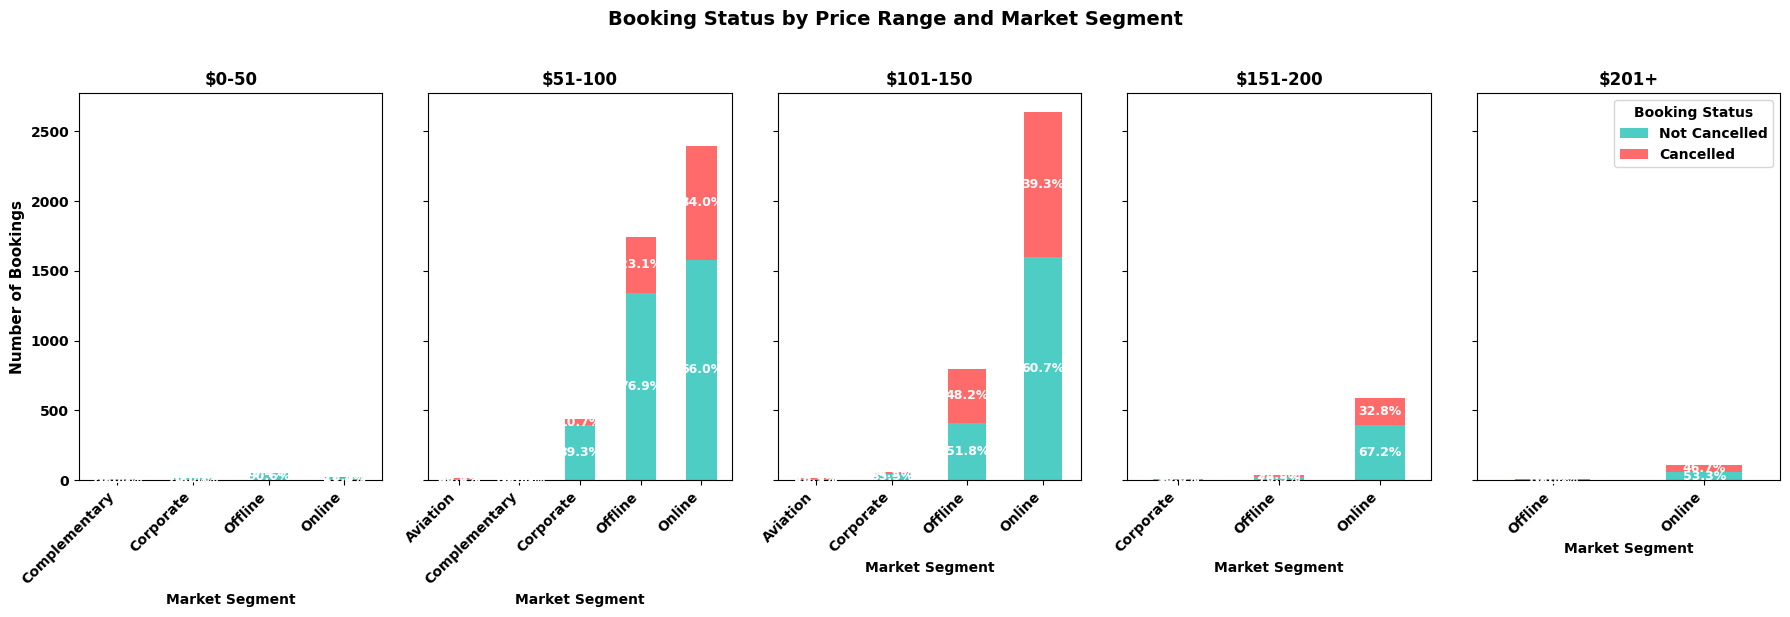

In [202]:
# Create price bins
bins = [0, 50, 100, 150, 200, df_HotelData_new['avg_price_per_room'].max() + 1]
labels = ['$0-50', '$51-100', '$101-150', '$151-200', '$201+']

# Create binned price column
price_binned = pd.cut(df_HotelData_new['avg_price_per_room'], bins=bins, labels=labels)

# Create temporary dataframe
plot_df = df_HotelData_new.copy()
plot_df['price_range'] = price_binned

# Create crosstab for each market segment and price range
fig, axes = plt.subplots(1, len(labels), figsize=(18, 6), sharey=True)

for idx, price_range in enumerate(labels):
    # Filter data for this price range
    price_data = plot_df[plot_df['price_range'] == price_range]
    
    # Create crosstab
    crosstab = pd.crosstab(price_data['market_segment_type'], 
                           price_data['booking_status'])
    
    # Reorder columns so Not_Canceled is first (bottom)
    if 'Not_Canceled' in crosstab.columns and 'Canceled' in crosstab.columns:
        crosstab = crosstab[['Not_Canceled', 'Canceled']]
    
    # Calculate percentages
    crosstab_pct = crosstab.div(crosstab.sum(axis=1), axis=0) * 100
    
    # Plot stacked bar
    crosstab.plot(kind='bar', stacked=True, ax=axes[idx], 
                  color=['#4ECDC4', '#FF6B6B'], legend=(idx == len(labels)-1))
    
    # Add percentage labels
    for i, segment in enumerate(crosstab.index):
        if 'Not_Canceled' in crosstab.columns:
            not_cancelled_count = crosstab.loc[segment, 'Not_Canceled']
            not_cancelled_pct = crosstab_pct.loc[segment, 'Not_Canceled']
            
            # Not Cancelled label (bottom)
            axes[idx].text(i, not_cancelled_count/2, f"{not_cancelled_pct:.1f}%", 
                          ha='center', va='center', fontsize=9, fontweight='bold', color='white')
        
        if 'Canceled' in crosstab.columns:
            cancelled_count = crosstab.loc[segment, 'Canceled']
            cancelled_pct = crosstab_pct.loc[segment, 'Canceled']
            
            # Cancelled label (top)
            bottom = crosstab.loc[segment, 'Not_Canceled'] if 'Not_Canceled' in crosstab.columns else 0
            axes[idx].text(i, bottom + cancelled_count/2, f"{cancelled_pct:.1f}%", 
                          ha='center', va='center', fontsize=9, fontweight='bold', color='white')
    
    # Formatting
    axes[idx].set_title(price_range, fontweight='bold', fontsize=12)
    axes[idx].set_xlabel('Market Segment', fontweight='bold', fontsize=10)
    if idx == 0:
        axes[idx].set_ylabel('Number of Bookings', fontweight='bold', fontsize=11)
    
    # Bold tick labels
    for label in axes[idx].get_xticklabels():
        label.set_fontweight('bold')
        label.set_rotation(45)
        label.set_ha('right')
    for label in axes[idx].get_yticklabels():
        label.set_fontweight('bold')

# Adjust legend
if axes[-1].get_legend():
    axes[-1].legend(title='Booking Status', title_fontproperties={'weight': 'bold'},
                    prop={'weight': 'bold'}, labels=['Not Cancelled', 'Cancelled'])

fig.suptitle('Booking Status by Price Range and Market Segment', 
             fontweight='bold', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

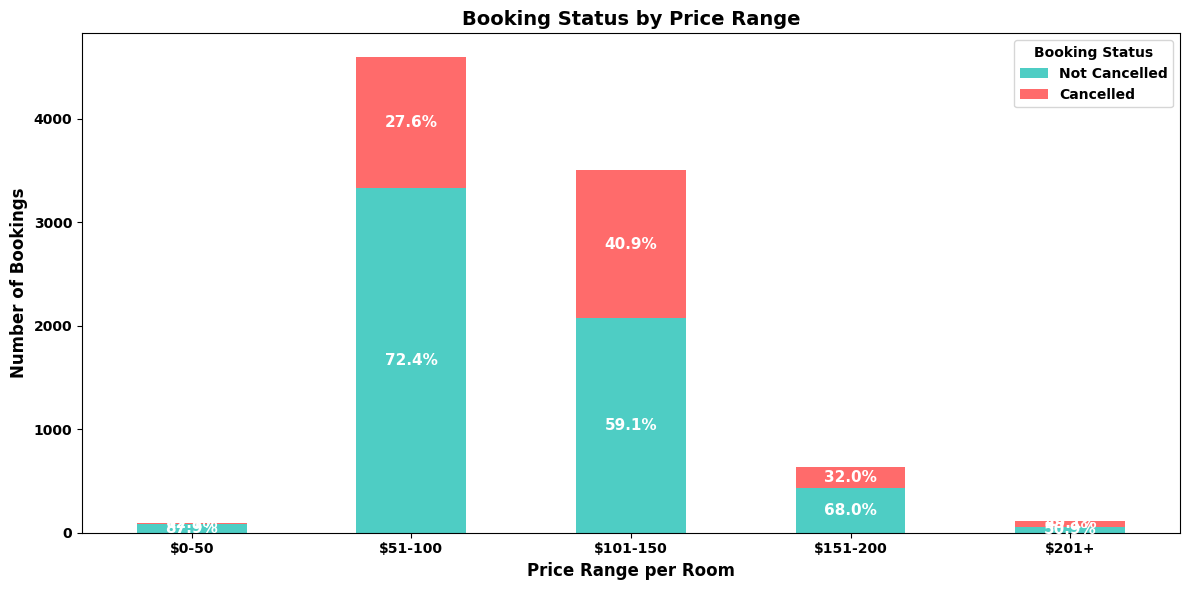


Booking Status by Price Range:
$0-50: 12.1% cancelled, 87.9% not cancelled (n=91)
$51-100: 27.6% cancelled, 72.4% not cancelled (n=4595)
$101-150: 40.9% cancelled, 59.1% not cancelled (n=3505)
$151-200: 32.0% cancelled, 68.0% not cancelled (n=632)
$201+: 49.1% cancelled, 50.9% not cancelled (n=112)


In [203]:
# Create price bins
bins = [0, 50, 100, 150, 200, df_HotelData_new['avg_price_per_room'].max() + 1]
labels = ['$0-50', '$51-100', '$101-150', '$151-200', '$201+']

# Create binned price column
price_binned = pd.cut(df_HotelData_new['avg_price_per_room'], bins=bins, labels=labels)

# Create temporary dataframe
plot_df = df_HotelData_new.copy()
plot_df['price_range'] = price_binned

# Create crosstab
crosstab = pd.crosstab(plot_df['price_range'], 
                       plot_df['booking_status'])

# Reorder columns so Not_Canceled is first (bottom)
crosstab = crosstab[['Not_Canceled', 'Canceled']]

# Calculate percentages
crosstab_pct = crosstab.div(crosstab.sum(axis=1), axis=0) * 100

# Create stacked bar chart
fig, ax = plt.subplots(figsize=(12, 6))

crosstab.plot(kind='bar', stacked=True, ax=ax, color=['#4ECDC4', '#FF6B6B'])

# Add percentage labels on stacked bars
for i, price_range in enumerate(crosstab.index):
    not_cancelled_count = crosstab.loc[price_range, 'Not_Canceled']
    cancelled_count = crosstab.loc[price_range, 'Canceled']
    
    not_cancelled_pct = crosstab_pct.loc[price_range, 'Not_Canceled']
    cancelled_pct = crosstab_pct.loc[price_range, 'Canceled']
    
    # Not Cancelled portion (bottom)
    ax.text(i, not_cancelled_count/2, f"{not_cancelled_pct:.1f}%", 
            ha='center', va='center', fontsize=11, fontweight='bold', color='white')
    
    # Cancelled portion (top)
    ax.text(i, not_cancelled_count + cancelled_count/2, f"{cancelled_pct:.1f}%", 
            ha='center', va='center', fontsize=11, fontweight='bold', color='white')

# Bold title and axis labels
ax.set_title('Booking Status by Price Range', fontweight='bold', fontsize=14)
ax.set_xlabel('Price Range per Room', fontweight='bold', fontsize=12)
ax.set_ylabel('Number of Bookings', fontweight='bold', fontsize=12)
ax.legend(title='Booking Status', title_fontproperties={'weight': 'bold'}, 
          prop={'weight': 'bold'}, labels=['Not Cancelled', 'Cancelled'])

# Bold tick labels
for label in ax.get_xticklabels():
    label.set_fontweight('bold')
    label.set_rotation(0)
for label in ax.get_yticklabels():
    label.set_fontweight('bold')

plt.tight_layout()
plt.show()

# Print summary
print("\nBooking Status by Price Range:")
print("=" * 60)
for price_range in crosstab.index:
    cancelled_pct = crosstab_pct.loc[price_range, 'Canceled']
    not_cancelled_pct = crosstab_pct.loc[price_range, 'Not_Canceled']
    total = crosstab.loc[price_range].sum()
    print(f"{price_range}: {cancelled_pct:.1f}% cancelled, {not_cancelled_pct:.1f}% not cancelled (n={total})")


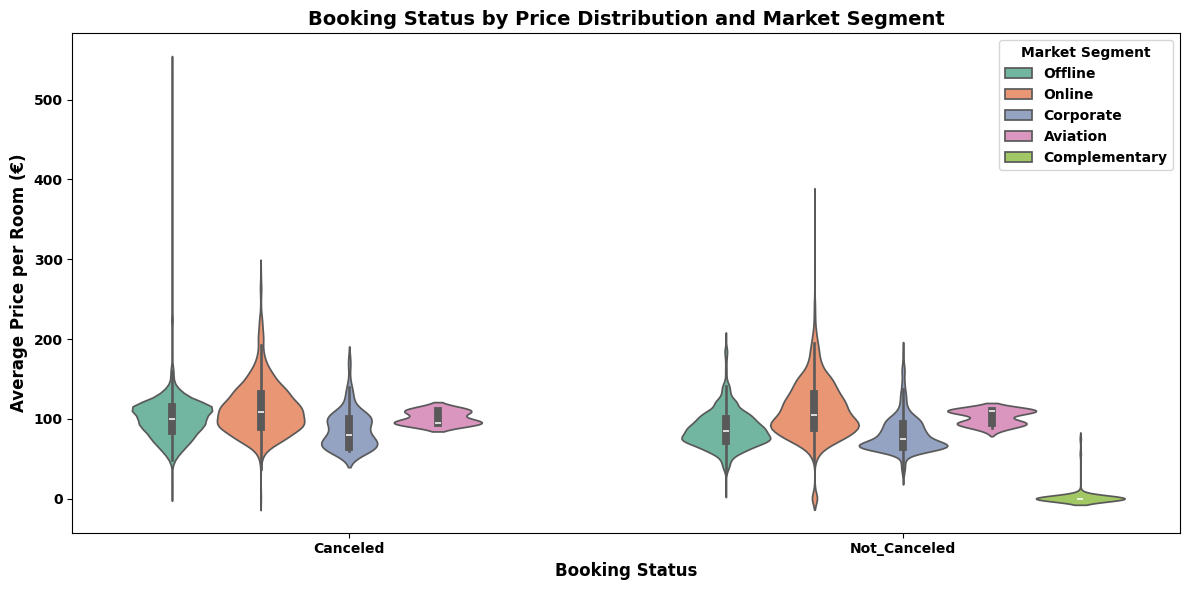

In [204]:
# Create grouped violin plot
fig, ax = plt.subplots(figsize=(12, 6))

sns.violinplot(data=df_HotelData_new, x='booking_status', y='avg_price_per_room', 
               hue='market_segment_type', palette='Set2', ax=ax, split=False)

# Bold title and axis labels
ax.set_title('Booking Status by Price Distribution and Market Segment', fontweight='bold', fontsize=14)
ax.set_xlabel('Booking Status', fontweight='bold', fontsize=12)
ax.set_ylabel('Average Price per Room (€)', fontweight='bold', fontsize=12)
ax.legend(title='Market Segment', title_fontproperties={'weight': 'bold'}, 
          prop={'weight': 'bold'})

# Bold tick labels
for label in ax.get_xticklabels():
    label.set_fontweight('bold')
for label in ax.get_yticklabels():
    label.set_fontweight('bold')

plt.tight_layout()
plt.show()

### <u>**Export Results back to CSV and JSON files**</u>


In [205]:
# # Print df Column Info
# df_NSME1988_new.info()
# # print()
# print()

# # Print Stats
# print("Description - Stats")
# print()
# pd.set_option('display.width', 1000)
# pd.set_option('display.max_columns', None)
# print(df_NSME1988_new.describe(include='all').T)


#### **Export Results back to CSV and JSON files** ####

In [206]:
# # Export the Cleaned up/ Translated Data to a Json and CSV files
# print("Exported the Cleaned up/ Translated Data to a Json file")
# df_NSME1988_new.to_json('NSMES1988New-Capstone-2.json', orient='records', indent=4)
# print()

# print("Exported the Cleaned up/ Translated Data to a CSV file")
# df_NSME1988_new.to_csv('NSMES1988New-Capstone-2.csv')
# print()

In [207]:
# fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 5))

# sns.boxplot(data=df_NSME1988_new, x='overall_health_factor', y='age', ax=axes[0])
# plt.title('Age Distribution by Overall Health Factor')

# sns.violinplot(data=df_NSME1988_new, x='overall_health_factor', y='age', ax=axes[1])
# plt.title('Age Distribution by Overall Health Factor')

# sns.stripplot(data=df_NSME1988_new, x='overall_health_factor', y='age', ax=axes[2])
# plt.title('Age by Overall Health Factor')

# sns.barplot(data=df_NSME1988_new, x='overall_health_factor', y='age', ax=axes[3])
# plt.title('Average Age by Overall Health Factor')

# plt.show()

In [208]:
# Get all numeric columns except the ones you want to exclude
numeric_cols = df_NSME1988_new.select_dtypes(include=['number']).columns
numeric_cols = [col for col in numeric_cols if col not in ['Unnamed: 0', 'id']]

# Create subplots
n_cols = len(numeric_cols)
fig, axes = plt.subplots(nrows=(n_cols + 2) // 3, ncols=3, figsize=(15, 5 * ((n_cols + 2) // 3)))
axes = axes.flatten()

# Plot box plots for each numeric feature vs overall_health_factor
for i, col in enumerate(numeric_cols):
    sns.boxplot(data=df_NSME1988_new, x='overall_health_factor', y=col, ax=axes[i])
    axes[i].set_title(f'{col} by Overall Health Factor')
    axes[i].tick_params(axis='x', rotation=45)

# Hide unused subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout(h_pad=3)
plt.show()

NameError: name 'df_NSME1988_new' is not defined

NameError: name 'df_NSME1988_new' is not defined

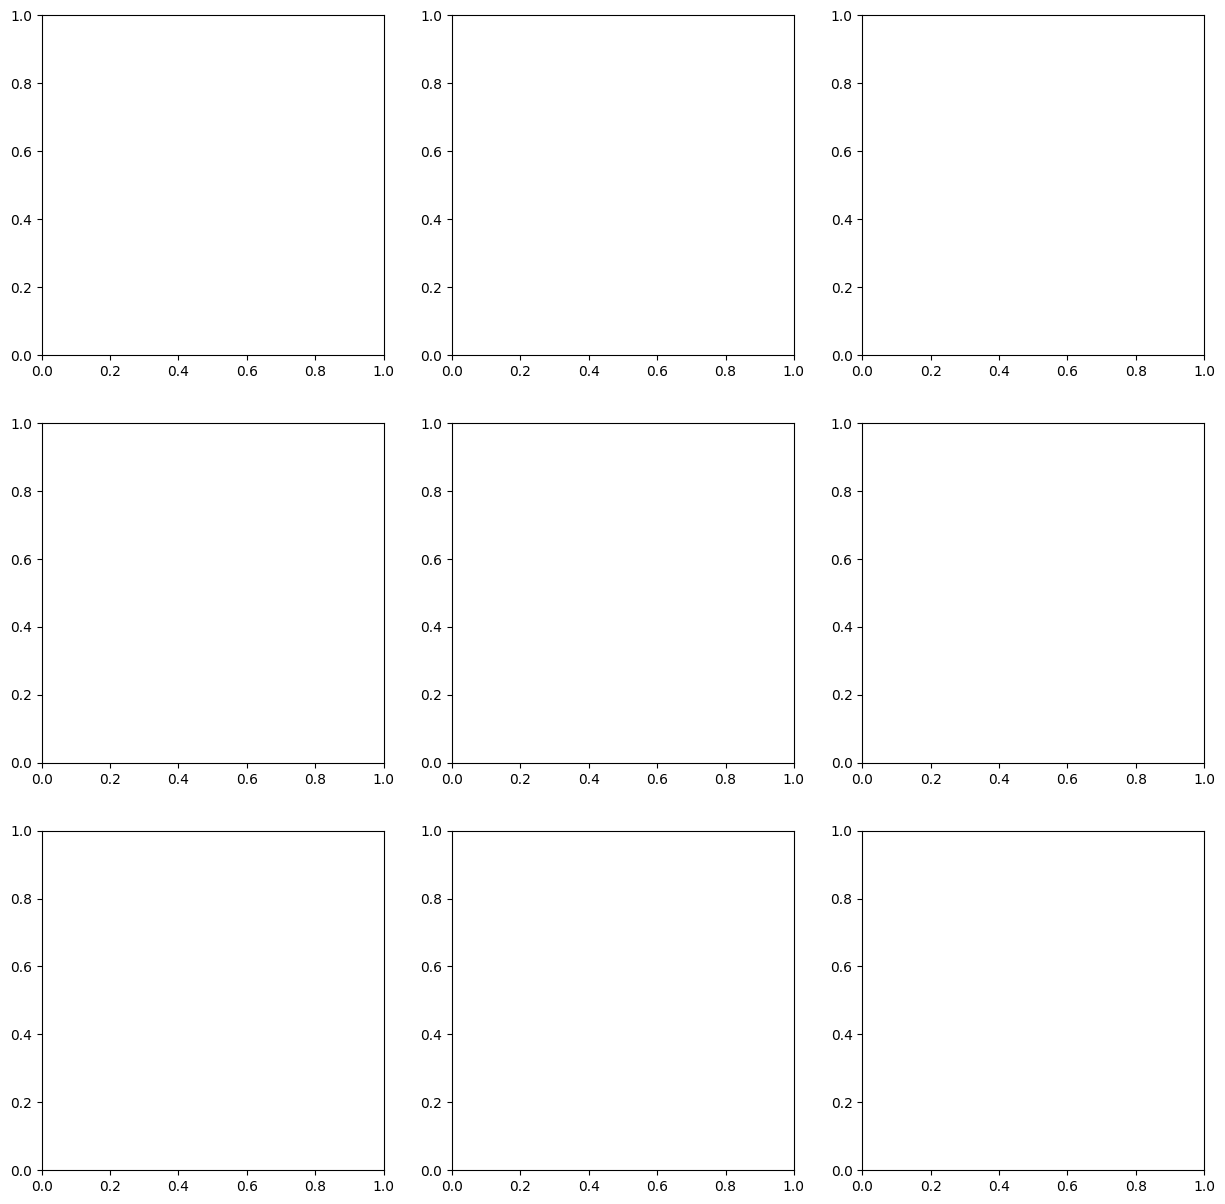

In [ ]:
# For categorical features, use count plots
# categorical_cols = ['gender', 'region', 'daily_living_activities', 'is_married', 'is_employed', 'has_health_insurance', 'has_medicaid']

# fig, axes = plt.subplots(nrows=(len(categorical_cols) + 2) // 3, ncols=3, figsize=(15, 5 * ((len(categorical_cols) + 2) // 3)))
# axes = axes.flatten()

# for i, col in enumerate(categorical_cols):
#     sns.countplot(data=df_NSME1988_new, x=col, hue='overall_health_factor', ax=axes[i])
#     axes[i].set_title(f'{col} by Overall Health Factor')
#     axes[i].tick_params(axis='x', rotation=45)

# for j in range(i + 1, len(axes)):
#     axes[j].set_visible(False)

# plt.tight_layout(h_pad=3)
# plt.show()

### **Capstone Session 2 Findings**

Intially I needed to do some data cleaning to be able to do some plots.  
I was able to do some histograms to look at the distributions of the features.  
I now have a basic understanding of most of the features - the plotting is visually useful.  
Other than "Other" in regions, I don't see any data values (ranges) that seem oddball or that could skew analysis.  

I am looking forward to doing some further analysis to compare the features and feature combinations against overall health.


